In [416]:
!pip install selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import re
import matplotlib.pyplot as plt
import seaborn as sns

# PHASE 1

* Store the entire data in two different CSV files as per the given fields:

The first CSV file data contains :

Sno, Movie Name, Director Name, Duration, year, ratings, Metascore

Bifurcate the Director field into subfields as per the number of directors of the movie belongs to such as Director1, director2

* The second CSV file contains the following:

Movie Name, stars, votes, Genre, Gross collection, popularity, Certification

Bifurcate the stars field into 4 subfields as per the number of stars worked in the movie such as star1, star2, star3, star4

Bifurcate the genre into 3 subfields as per the number of genres the movie belongs to such as :

Genre1, genre2, genre3

In [417]:
driver=webdriver.Chrome(r'E:\chromedriver_win32 (2).exe')
driver.get("https://www.imdb.com/search/title/?genres=action&sort=user_rating,desc&title_type=feature&num_votes=25000,&pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=f11158cc-b50b-4c4d-b0a2-40b32863395b&pf_rd_r=XZ8X52H1R40B7KG5SNZ9&pf_rd_s=right-6&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_gnr_1")

# SPLIT DIRRCTOR AND STAR

In [418]:
a=[]
a_tags=driver.find_elements(By.XPATH,'//div[@class="lister-item-content"]/p[3]')
for i in a_tags:
    a.append(i.text)
director1 = []
director2 = []
star1 = []
star2 = []
star3 = []
star4 = []

In [419]:
for movie in a:
    # Extracting Director and Stars information
    movie_data = movie.split('|')
    director = movie_data[0].split(':')[1].strip()
    stars = movie_data[1].split(':')[1].strip().split(', ')

    # Separating Director 1 and Director 2
    if len(director.split(', ')) > 1:
        directors = director.split(', ')
        director1.append(directors[0])
        director2.append(directors[1])
    else:
        director1.append(director)
        director2.append(None)

    # Separating Star 1, Star 2, Star 3, and Star 4
    if len(stars) > 0:
        star1.append(stars[0])
    else:
        star1.append(None)

    if len(stars) > 1:
        star2.append(stars[1])
    else:
        star2.append(None)

    if len(stars) > 2:
        star3.append(stars[2])
    else:
        star3.append(None)

    if len(stars) > 3:
        star4.append(stars[3])
    else:
        star4.append(None)

# TABLE 1

In [420]:
sno=[]
sno_tags=driver.find_elements(By.XPATH,'//div[@class="lister-item-content"]/h3/span[1]')
for i in sno_tags:
    sno.append(i.text)
movie_name=[]
mov_tags=driver.find_elements(By.XPATH,'//div[@class="lister-item-content"]/h3/a')
for i in mov_tags:
    movie_name.append(i.text)
duration=[]
dur_tags=driver.find_elements(By.XPATH,'//div[@class="lister-item-content"]/p[1]/span[3]')
for i in dur_tags:
    duration.append(i.text)
year=[]
year_tags=driver.find_elements(By.XPATH,'//div[@class="lister-item-content"]/h3[1]/span[2]')
for i in year_tags:
    year.append(i.text)
rat=[]
rat_tags=driver.find_elements(By.XPATH,'//div[@class="lister-item-content"]/div[1]/div[1]')
for i in rat_tags:
    rat.append(i.text)
met=[]
met_tags=driver.find_elements(By.XPATH,'//div[@class="lister-item-content"]/div[1]/div[3]/span[1]')
for i in met_tags:
    met.append(i.text)
met.insert(7,None)
met.insert(12,None)
met.insert(22,None)
met.insert(23,None)
met.insert(30,None)
met.insert(31,None)
met.insert(32,None)
met.insert(33,None)
met.insert(34,None)
met.insert(35,None)
met.insert(47,None)
df1=pd.DataFrame({'SNO.':sno,'MOVIE NAME':movie_name,'DIRECTOR1':director1,'DIRECTOR2':director2,'DURATION':duration,'YEAR':year,'RATING':rat,'METSCORE':met})
df1

,SNO.,MOVIE NAME,DIRECTOR1,DIRECTOR2,DURATION,YEAR,RATING,METSCORE
0,1.,Spider-Man: Across the Spider-Verse,Joaquim Dos Santos,Kemp Powers,140 min,(2023),9.0,86
1,2.,The Dark Knight,Christopher Nolan,None,152 min,(2008),9.0,84
2,3.,The Lord of the Rings: The Return of the King,Peter Jackson,None,201 min,(2003),9.0,94
3,4.,Inception,Christopher Nolan,None,148 min,(2010),8.8,74
4,5.,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,None,178 min,(2001),8.8,92
5,6.,The Lord of the Rings: The Two Towers,Peter Jackson,None,179 min,(2002),8.8,87
6,7.,The Matrix,Lana Wachowski,Lilly Wachowski,136 min,(1999),8.7,73
7,8.,Star Wars: Episode V - The Empire Strikes Back,Irvin Kershner,None,124 min,(1980),8.7,None
8,9.,Soorarai Pottru,Sudha Kongara,None,153 min,(2020),8.7,82
9,10.,Terminator 2: Judgment Day,James Cameron,None,137 min,(1991),8.6,75


# TABLE 2

In [421]:
movie_name=[]
mov_tags=driver.find_elements(By.XPATH,'//div[@class="lister-item-content"]/h3/a')
for i in mov_tags:
    movie_name.append(i.text)
vot=[]
vot_tags=driver.find_elements(By.XPATH,'//div[@class="lister-item-content"]/p[4]/span[2]')
for i in vot_tags:
    vot.append(i.text)
gen=[]
gen_tags=driver.find_elements(By.XPATH,'//div[@class="lister-item-content"]/p[1]/span[5]')
for i in gen_tags:
    gen.append(i.text)
genre1 = []
genre2 = []
genre3 = []

for element in gen:
    genres = element.split(", ")
    if len(genres)==3:
        genre1.append(genres[0])
        genre2.append(genres[1])
        genre3.append(genres[2])
    if len(genres)==2:
        genre1.append(genres[0])
        genre2.append(genres[1])
        genre3.append(None)
gross=[]
gross_tags=driver.find_elements(By.XPATH,'//div[@class="lister-item-content"]/p[4]/span[5]')
for i in gross_tags:
    gross.append(i.text)
gross.insert(8,None)
gross.insert(12,None)
gross.insert(13,None)
gross.insert(22,None)
gross.insert(23,None)
gross.insert(24,None)
gross.insert(30,None)
gross.insert(33,None)
gross.insert(34,None)
gross.insert(35,None)
gross.insert(36,None)
gross.insert(47,None)
gross.insert(48,None)
gross.insert(49,None)
cer=[]
cer_tags=driver.find_elements(By.XPATH,'//div[@class="lister-item-content"]/p[1]/span[1]')
for i in cer_tags:
    cer.append(i.text)
df2=pd.DataFrame({'MOVIE NAME':movie_name,'STAR 1':star1,'STAR 2':star2,'STAR 3':star3,'STAR 4':star4,'VOTE':vot,'GENRE1':genre1,'GENRE2':genre2,'GENRE3':genre3,'GROSS COLLECTION':gross,'CERTIFICATION':cer})
df2

,MOVIE NAME,STAR 1,STAR 2,STAR 3,STAR 4,VOTE,GENRE1,GENRE2,GENRE3,GROSS COLLECTION,CERTIFICATION
0,Spider-Man: Across the Spider-Verse,Shameik Moore,Hailee Steinfeld,Brian Tyree Henry,Luna Lauren Velez,"115,843",Animation,Action,Adventure,$534.86M,PG
1,The Dark Knight,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,"2,724,508",Action,Crime,Drama,$377.85M,12A
2,The Lord of the Rings: The Return of the King,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,"1,890,537",Action,Adventure,Drama,$292.58M,12A
3,Inception,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,"2,418,220",Action,Adventure,Sci-Fi,$315.54M,12A
4,The Lord of the Rings: The Fellowship of the Ring,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,"1,919,131",Action,Adventure,Drama,$342.55M,PG
5,The Lord of the Rings: The Two Towers,Elijah Wood,Ian McKellen,Viggo Mortensen,Orlando Bloom,"1,706,282",Action,Adventure,Drama,$171.48M,12A
6,The Matrix,Keanu Reeves,Laurence Fishburne,Carrie-Anne Moss,Hugo Weaving,"1,961,692",Action,Sci-Fi,None,$290.48M,15
7,Star Wars: Episode V - The Empire Strikes Back,Mark Hamill,Harrison Ford,Carrie Fisher,Billy Dee Williams,"1,323,672",Action,Adventure,Fantasy,$204.84M,U
8,Soorarai Pottru,Suriya,Aparna Balamurali,Paresh Rawal,Urvashi,"119,624",Action,Drama,None,None,15
9,Terminator 2: Judgment Day,Arnold Schwarzenegger,Linda Hamilton,Edward Furlong,Robert Patrick,"1,125,246",Action,Sci-Fi,None,$322.74M,15


In [422]:
df2["VOTE"] = df2["VOTE"].str.replace(",", "").astype(int)
df2['GROSS COLLECTION'] = df2['GROSS COLLECTION'].str.replace('$', '')
df2['GROSS COLLECTION'] = df2['GROSS COLLECTION'].str.replace('M', '')
df2['GROSS COLLECTION'] = df2['GROSS COLLECTION'].astype(float)

# SAVE TABLES IN CSV FILE

In [423]:
# Specify the file path and name
csv_file = 'imdb_directors.csv'

# Save the DataFrame as a CSV file
df1.to_csv(csv_file, index=False)

In [424]:
# Specify the file path and name
csv_file = 'imdb_genre.csv'

# Save the DataFrame as a CSV file
df2.to_csv(csv_file, index=False)

# Make two tables and corresponding columns provided in the above CSV files in SQLite DBMS. Insert all data of each CSV file in each of the created tables. Now start querying the table(s) in the  SQL workbench / SQLite database :

# PHASE 2

# BY SQLite DBMS

# TABLE 1

In [427]:
cursor.execute("DROP TABLE IF EXISTS movies")
cursor.execute("DROP TABLE IF EXISTS movies1")


In [428]:
import sqlite3
import csv

# Connect to the database (creates a new database if it doesn't exist)
conn = sqlite3.connect('imdb.db')

# Create a cursor object to execute SQL commands
cursor = conn.cursor()

# Create the table
cursor.execute('''
    CREATE TABLE movies (
        SNO INTEGER,
        MOVIE_NAME TEXT,
        DIRECTOR1 TEXT,
        DIRECTOR2 TEXT,
        DURATION TEXT,
        YEAR TEXT,
        RATING REAL,
        METSCORE INTEGER
    )
''')

# Read data from the CSV file and insert into the table
with open('imdb_directors.csv', 'r') as file:
    total_record=0
    for i in file:
        cursor.execute("insert into movies values(?, ?, ?, ?, ?, ?, ?, ?)",i.split(","))
        conn.commit()
        total_record+=1
print(total_record,'records inserted')    

51 records inserted


In [429]:
result =cursor.execute("select * from movies")
for i in result:
    print(i)

('SNO.', 'MOVIE NAME', 'DIRECTOR1', 'DIRECTOR2', 'DURATION', 'YEAR', 'RATING', 'METSCORE\n')
(1, 'Spider-Man: Across the Spider-Verse', 'Joaquim Dos Santos', 'Kemp Powers', '140 min', '(2023)', 9.0, 86)
(2, 'The Dark Knight', 'Christopher Nolan', '', '152 min', '(2008)', 9.0, 84)
(3, 'The Lord of the Rings: The Return of the King', 'Peter Jackson', '', '201 min', '(2003)', 9.0, 94)
(4, 'Inception', 'Christopher Nolan', '', '148 min', '(2010)', 8.8, 74)
(5, 'The Lord of the Rings: The Fellowship of the Ring', 'Peter Jackson', '', '178 min', '(2001)', 8.8, 92)
(6, 'The Lord of the Rings: The Two Towers', 'Peter Jackson', '', '179 min', '(2002)', 8.8, 87)
(7, 'The Matrix', 'Lana Wachowski', 'Lilly Wachowski', '136 min', '(1999)', 8.7, 73)
(8, 'Star Wars: Episode V - The Empire Strikes Back', 'Irvin Kershner', '', '124 min', '(1980)', 8.7, '\n')
(9, 'Soorarai Pottru', 'Sudha Kongara', '', '153 min', '(2020)', 8.7, 82)
(10, 'Terminator 2: Judgment Day', 'James Cameron', '', '137 min', '(199

1)  Display all the details of movies created by directors Christopher and Matt Reeves.

In [430]:
query = cursor.execute("SELECT * FROM movies WHERE DIRECTOR1 = 'Christopher Nolan' OR DIRECTOR1 = 'Matt Reeves' OR DIRECTOR2 = 'Matt Reeves'")
for row in query:
    print(row)


(2, 'The Dark Knight', 'Christopher Nolan', '', '152 min', '(2008)', 9.0, 84)
(4, 'Inception', 'Christopher Nolan', '', '148 min', '(2010)', 8.8, 74)
(22, 'The Dark Knight Rises', 'Christopher Nolan', '', '164 min', '(2012)', 8.4, 78)
(42, 'Batman Begins', 'Christopher Nolan', '', '140 min', '(2005)', 8.2, 70)


2) Display all the details of movies with a duration of 140 minutes to 190 minutes.

In [431]:
# Execute the SELECT query and read the results into a DataFrame
query = cursor.execute("SELECT * FROM movies WHERE DURATION >= '140 min' AND DURATION <= '190 min'")
for i in query:
    print(i)

(1, 'Spider-Man: Across the Spider-Verse', 'Joaquim Dos Santos', 'Kemp Powers', '140 min', '(2023)', 9.0, 86)
(2, 'The Dark Knight', 'Christopher Nolan', '', '152 min', '(2008)', 9.0, 84)
(4, 'Inception', 'Christopher Nolan', '', '148 min', '(2010)', 8.8, 74)
(5, 'The Lord of the Rings: The Fellowship of the Ring', 'Peter Jackson', '', '178 min', '(2001)', 8.8, 92)
(6, 'The Lord of the Rings: The Two Towers', 'Peter Jackson', '', '179 min', '(2002)', 8.8, 87)
(9, 'Soorarai Pottru', 'Sudha Kongara', '', '153 min', '(2020)', 8.7, 82)
(14, 'Sita Ramam', 'Hanu Raghavapudi', '', '163 min', '(2022)', 8.6, 85)
(16, 'Gladiator', 'Ridley Scott', '', '155 min', '(2000)', 8.5, 67)
(19, 'Avengers: Endgame', 'Anthony Russo', 'Joe Russo', '181 min', '(2019)', 8.4, 78)
(20, 'Avengers: Infinity War', 'Anthony Russo', 'Joe Russo', '149 min', '(2018)', 8.4, 68)
(22, 'The Dark Knight Rises', 'Christopher Nolan', '', '164 min', '(2012)', 8.4, 78)
(24, 'Kaithi', 'Lokesh Kanagaraj', '', '145 min', '(2019)',

3) Display all details of movies with ratings above 7 in ascending order.

In [432]:
# Execute the SELECT query and read the results into a DataFrame
query =cursor.execute("SELECT * FROM movies WHERE RATING > 7 ORDER BY RATING ASC")
for i in query:
    print(i)

(37, 'Guardians of the Galaxy Vol. 3', 'James Gunn', '', '150 min', '(2023)', 8.2, 64)
(38, 'Spider-Man: No Way Home', 'Jon Watts', '', '148 min', '(2021)', 8.2, 71)
(39, 'Jurassic Park', 'Steven Spielberg', '', '127 min', '(1993)', 8.2, 68)
(40, 'Indiana Jones and the Last Crusade', 'Steven Spielberg', '', '127 min', '(1989)', 8.2, 65)
(41, '1917', 'Sam Mendes', '', '119 min', '(2019)', 8.2, 78)
(42, 'Batman Begins', 'Christopher Nolan', '', '140 min', '(2005)', 8.2, 70)
(43, 'Kill Bill: Vol. 1', 'Quentin Tarantino', '', '111 min', '(2003)', 8.2, 69)
(44, 'Die Hard', 'John McTiernan', '', '132 min', '(1988)', 8.2, 72)
(45, 'V for Vendetta', 'James McTeigue', '', '132 min', '(2005)', 8.2, 62)
(46, 'Demon Slayer the Movie: Mugen Train', 'Haruo Sotozaki', '', '117 min', '(2020)', 8.2, 72)
(47, 'Ran', 'Akira Kurosawa', '', '162 min', '(1985)', 8.2, 97)
(48, 'Gangs of Wasseypur', 'Anurag Kashyap', '', '321 min', '(2012)', 8.2, '\n')
(49, 'Yojimbo', 'Akira Kurosawa', '', '110 min', '(1961)'

4) Display all movie names in descending order.

In [433]:
# Execute the SELECT query and read the results into a DataFrame
query = cursor.execute("SELECT MOVIE_NAME FROM movies ORDER BY MOVIE_NAME DESC")
for i in query:
    print(i)

('Yojimbo',)
('Vikram Vedha',)
('Vikram',)
('V for Vendetta',)
('Top Gun: Maverick',)
('The Matrix',)
('The Lord of the Rings: The Two Towers',)
('The Lord of the Rings: The Return of the King',)
('The Lord of the Rings: The Fellowship of the Ring',)
('The Dark Knight Rises',)
('The Dark Knight',)
('Terminator 2: Judgment Day',)
('Star Wars: Return of the Jedi',)
('Star Wars: Episode V - The Empire Strikes Back',)
('Star Wars: Episode IV - A New Hope',)
('Spider-Man: No Way Home',)
('Spider-Man: Into the Spider-Verse',)
('Spider-Man: Across the Spider-Verse',)
('Soorarai Pottru',)
('Sita Ramam',)
('Shershaah',)
('Seven Samurai',)
('Ran',)
('Raiders of the Lost Ark',)
('Raatchasan',)
('Princess Mononoke',)
('Oldboy',)
('North by Northwest',)
('MOVIE NAME',)
('Leon',)
('Kill Bill: Vol. 1',)
('Kantara',)
('Kaithi',)
('K.G.F: Chapter 2',)
('Jurassic Park',)
('Indiana Jones and the Last Crusade',)
('Inception',)
('Heat',)
('Harakiri',)
('Guardians of the Galaxy Vol. 3',)
('Gladiator',)
('Ga

5) Display movie name starts with ‘P’ and their rating is greater than 7.



In [434]:
# Execute the SELECT query and read the results into a DataFrame
query = cursor.execute("SELECT MOVIE_NAME FROM movies WHERE MOVIE_NAME LIKE 'P%' AND RATING > 7")
for i in query:
    print(i)


('Princess Mononoke',)


# TABLE 2

In [435]:
import sqlite3
import csv

# Connect to the database (creates a new database if it doesn't exist)
conn = sqlite3.connect('imdb.db')

# Create a cursor object to execute SQL commands
cursor = conn.cursor()

# Create the table
cursor.execute('''
    CREATE TABLE movies1(
        MOVIE_NAME TEXT,
        STAR_1 TEXT,
        STAR_2 TEXT,
        STAR_3 TEXT,
        STAR_4 TEXT,
        VOTE INT,
        GENRE_1 TEXT,
        GENRE_2 TEXT,
        GENRE_3 TEXT,
        GROSS_COLLECTION TEXT,
        CERTIFICATION TEXT
    )
''')

# Read data from the CSV file and insert into the table
with open('imdb_genre.csv', 'r') as file:
    csv_reader = csv.reader(file)
    total_records = 0
    for row in csv_reader:
        cursor.execute("INSERT INTO movies1 VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)", row)
        conn.commit()
        total_records += 1

print(total_records, 'records inserted')


51 records inserted


1) Display all movie names with star Arnold Schwarzenegger in ascending order.

In [436]:
# Execute the SELECT query and read the results into a DataFrame
query = cursor.execute("SELECT MOVIE_NAME FROM movies1 WHERE STAR_1 = 'Arnold Schwarzenegger' ORDER BY MOVIE_NAME ASC")
for i in query:
    print(i)

('Terminator 2: Judgment Day',)


2) Display all details of the movie with the highest number of votes.

In [437]:
query = cursor.execute("SELECT * FROM movies1 WHERE CAST(VOTE AS INTEGER) = (SELECT MAX(CAST(VOTE AS INTEGER)) FROM movies1)")
for row in query:
    print(row)


('The Dark Knight', 'Christian Bale', 'Heath Ledger', 'Aaron Eckhart', 'Michael Caine', 2724508, 'Action', 'Crime', 'Drama', '377.85', '12A')


3.) Display movie names with gross collections in descending order.

In [438]:
# Execute the SELECT query and read the results into a DataFrame
query = cursor.execute("SELECT MOVIE_NAME FROM movies1 ORDER BY GROSS_COLLECTION DESC")
for i in query:
    print(i)


('MOVIE NAME',)
('Raiders of the Lost Ark',)
('The Dark Knight Rises',)
('Die Hard',)
('Spider-Man: No Way Home',)
('Top Gun: Maverick',)
('V for Vendetta',)
('Kill Bill: Vol. 1',)
('Avengers: Endgame',)
('Heat',)
('Vikram',)
('Spider-Man: Across the Spider-Verse',)
('Demon Slayer the Movie: Mugen Train',)
('Oldboy',)
('Jurassic Park',)
('Ran',)
('The Dark Knight',)
('The Lord of the Rings: The Fellowship of the Ring',)
('Terminator 2: Judgment Day',)
('Inception',)
('Star Wars: Return of the Jedi',)
('The Lord of the Rings: The Return of the King',)
('The Matrix',)
('Spider-Man: Into the Spider-Verse',)
('Batman Begins',)
('Star Wars: Episode V - The Empire Strikes Back',)
('Princess Mononoke',)
('Indiana Jones and the Last Crusade',)
('Gladiator',)
('Seven Samurai',)
('Leon',)
('The Lord of the Rings: The Two Towers',)
('1917',)
('North by Northwest',)
('Dangal',)
('Avengers: Infinity War',)
('Star Wars: Episode IV - A New Hope',)
('Soorarai Pottru',)
('Harakiri',)
('Sita Ramam',)
('

4) Display the gross collection of movies with the star Arnold.

In [439]:
# Execute the SELECT query and read the results into a DataFrame
query =cursor.execute("SELECT MOVIE_NAME, GROSS_COLLECTION FROM movies1 WHERE STAR_1 = 'Arnold Schwarzenegger' OR STAR_2 = 'Arnold Schwarzenegger' OR STAR_3 = 'Arnold Schwarzenegger' OR STAR_4 = 'Arnold Schwarzenegger'")
for i in query:
    print(i)

('Terminator 2: Judgment Day', '322.74')


5) Display all details of movies with comedy and action genres.

In [440]:
# Execute the SQL query
query=cursor.execute("SELECT * FROM movies1 WHERE GENRE_1 = 'Action'or'Comedy' or GENRE_2 = 'Comedy'or'Action' or GENRE_3 = 'Action'or'Comedy'")
for i in query:
    print(i)

('The Dark Knight', 'Christian Bale', 'Heath Ledger', 'Aaron Eckhart', 'Michael Caine', 2724508, 'Action', 'Crime', 'Drama', '377.85', '12A')
('The Lord of the Rings: The Return of the King', 'Elijah Wood', 'Viggo Mortensen', 'Ian McKellen', 'Orlando Bloom', 1890537, 'Action', 'Adventure', 'Drama', '292.58', '12A')
('Inception', 'Leonardo DiCaprio', 'Joseph Gordon-Levitt', 'Elliot Page', 'Ken Watanabe', 2418220, 'Action', 'Adventure', 'Sci-Fi', '315.54', '12A')
('The Lord of the Rings: The Fellowship of the Ring', 'Elijah Wood', 'Ian McKellen', 'Orlando Bloom', 'Sean Bean', 1919131, 'Action', 'Adventure', 'Drama', '342.55', 'PG')
('The Lord of the Rings: The Two Towers', 'Elijah Wood', 'Ian McKellen', 'Viggo Mortensen', 'Orlando Bloom', 1706282, 'Action', 'Adventure', 'Drama', '171.48', '12A')
('The Matrix', 'Keanu Reeves', 'Laurence Fishburne', 'Carrie-Anne Moss', 'Hugo Weaving', 1961692, 'Action', 'Sci-Fi', '', '290.48', '15')
('Star Wars: Episode V - The Empire Strikes Back', 'Mark 

# SUB QUERY

1) Display all details from both tables where movie names are the same.

In [441]:
query = cursor.execute("SELECT m.*, m1.* FROM movies m JOIN movies1 m1 ON m.MOVIE_NAME = m1.MOVIE_NAME")

# Fetch the column names
column_names = [description[0] for description in query.description]

# Print the column names
print(column_names)

# Fetch all the results
results = query.fetchall()

# Print the results
for row in results:
    print(row)


['SNO', 'MOVIE_NAME', 'DIRECTOR1', 'DIRECTOR2', 'DURATION', 'YEAR', 'RATING', 'METSCORE', 'MOVIE_NAME', 'STAR_1', 'STAR_2', 'STAR_3', 'STAR_4', 'VOTE', 'GENRE_1', 'GENRE_2', 'GENRE_3', 'GROSS_COLLECTION', 'CERTIFICATION']
('SNO.', 'MOVIE NAME', 'DIRECTOR1', 'DIRECTOR2', 'DURATION', 'YEAR', 'RATING', 'METSCORE\n', 'MOVIE NAME', 'STAR 1', 'STAR 2', 'STAR 3', 'STAR 4', 'VOTE', 'GENRE1', 'GENRE2', 'GENRE3', 'GROSS COLLECTION', 'CERTIFICATION')
(1, 'Spider-Man: Across the Spider-Verse', 'Joaquim Dos Santos', 'Kemp Powers', '140 min', '(2023)', 9.0, 86, 'Spider-Man: Across the Spider-Verse', 'Shameik Moore', 'Hailee Steinfeld', 'Brian Tyree Henry', 'Luna Lauren Velez', 115843, 'Animation', 'Action', 'Adventure', '534.86', 'PG')
(2, 'The Dark Knight', 'Christopher Nolan', '', '152 min', '(2008)', 9.0, 84, 'The Dark Knight', 'Christian Bale', 'Heath Ledger', 'Aaron Eckhart', 'Michael Caine', 2724508, 'Action', 'Crime', 'Drama', '377.85', '12A')
(3, 'The Lord of the Rings: The Return of the Kin

2)   Display all movie names, Director1,Director2, ratings, and gross collection where the genre is action.

In [442]:
query = cursor.execute("""
    SELECT m.MOVIE_NAME, m.DIRECTOR1, m.DIRECTOR2, m.RATING, m1.GROSS_COLLECTION
    FROM movies m
    JOIN movies1 m1 ON m.MOVIE_NAME = m1.MOVIE_NAME
    WHERE m1.GENRE_1 = 'Action' OR m1.GENRE_2 = 'Action' OR m1.GENRE_3 = 'Action'
""")

# Fetch the column names
column_names = [description[0] for description in query.description]

# Print the column names
print(column_names)

# Fetch all the results
results = query.fetchall()

# Print the results
for row in results:
    print(row)


['MOVIE_NAME', 'DIRECTOR1', 'DIRECTOR2', 'RATING', 'GROSS_COLLECTION']
('Spider-Man: Across the Spider-Verse', 'Joaquim Dos Santos', 'Kemp Powers', 9.0, '534.86')
('The Dark Knight', 'Christopher Nolan', '', 9.0, '377.85')
('The Lord of the Rings: The Return of the King', 'Peter Jackson', '', 9.0, '292.58')
('Inception', 'Christopher Nolan', '', 8.8, '315.54')
('The Lord of the Rings: The Fellowship of the Ring', 'Peter Jackson', '', 8.8, '342.55')
('The Lord of the Rings: The Two Towers', 'Peter Jackson', '', 8.8, '171.48')
('The Matrix', 'Lana Wachowski', 'Lilly Wachowski', 8.7, '290.48')
('Star Wars: Episode V - The Empire Strikes Back', 'Irvin Kershner', '', 8.7, '204.84')
('Soorarai Pottru', 'Sudha Kongara', '', 8.7, '')
('Terminator 2: Judgment Day', 'James Cameron', '', 8.6, '322.74')
('Star Wars: Episode IV - A New Hope', 'George Lucas', '', 8.6, '0.27')
('Seven Samurai', 'Akira Kurosawa', '', 8.6, '19.5')
('Harakiri', 'Masaki Kobayashi', '', 8.6, '')
('Sita Ramam', 'Hanu Ragha

3)      Display all details from both tables with the highest gross collection.

In [443]:
query = cursor.execute("""
    SELECT m.*, m1.*
    FROM movies m
    JOIN movies1 m1 ON m.MOVIE_NAME = m1.MOVIE_NAME
    WHERE m1.GROSS_COLLECTION = (
        SELECT MAX(GROSS_COLLECTION)
        FROM movies1
    )
""")

# Fetch the column names
column_names = [description[0] for description in query.description]

# Print the column names
print(column_names)

# Fetch all the results
results = query.fetchall()

# Print the results
for row in results:
    print(row)


['SNO', 'MOVIE_NAME', 'DIRECTOR1', 'DIRECTOR2', 'DURATION', 'YEAR', 'RATING', 'METSCORE', 'MOVIE_NAME', 'STAR_1', 'STAR_2', 'STAR_3', 'STAR_4', 'VOTE', 'GENRE_1', 'GENRE_2', 'GENRE_3', 'GROSS_COLLECTION', 'CERTIFICATION']
('SNO.', 'MOVIE NAME', 'DIRECTOR1', 'DIRECTOR2', 'DURATION', 'YEAR', 'RATING', 'METSCORE\n', 'MOVIE NAME', 'STAR 1', 'STAR 2', 'STAR 3', 'STAR 4', 'VOTE', 'GENRE1', 'GENRE2', 'GENRE3', 'GROSS COLLECTION', 'CERTIFICATION')


4)      Display all details from both tables with the highest ratings

In [444]:
query = cursor.execute("""
    SELECT m.SNO, m.MOVIE_NAME, m.DIRECTOR1, m.DIRECTOR2, m.DURATION, m.YEAR, m.RATING, m.METSCORE, m1.STAR_1, m1.STAR_2, m1.STAR_3, m1.STAR_4, m1.VOTE, m1.GENRE_1, m1.GENRE_2, m1.GENRE_3, m1.GROSS_COLLECTION, m1.CERTIFICATION
    FROM movies m
    JOIN movies1 m1 ON m.MOVIE_NAME = m1.MOVIE_NAME
    WHERE CAST(m.RATING AS FLOAT) = (
        SELECT MAX(CAST(RATING AS FLOAT))
        FROM movies
    )
    ORDER BY CAST(m.RATING AS FLOAT) DESC
""")

# Fetch the column names
column_names = [description[0] for description in query.description]

# Print the column names
print(column_names)

# Fetch all the results
results = query.fetchall()

# Print the results
for row in results:
    print(row)


['SNO', 'MOVIE_NAME', 'DIRECTOR1', 'DIRECTOR2', 'DURATION', 'YEAR', 'RATING', 'METSCORE', 'STAR_1', 'STAR_2', 'STAR_3', 'STAR_4', 'VOTE', 'GENRE_1', 'GENRE_2', 'GENRE_3', 'GROSS_COLLECTION', 'CERTIFICATION']
(1, 'Spider-Man: Across the Spider-Verse', 'Joaquim Dos Santos', 'Kemp Powers', '140 min', '(2023)', 9.0, 86, 'Shameik Moore', 'Hailee Steinfeld', 'Brian Tyree Henry', 'Luna Lauren Velez', 115843, 'Animation', 'Action', 'Adventure', '534.86', 'PG')
(2, 'The Dark Knight', 'Christopher Nolan', '', '152 min', '(2008)', 9.0, 84, 'Christian Bale', 'Heath Ledger', 'Aaron Eckhart', 'Michael Caine', 2724508, 'Action', 'Crime', 'Drama', '377.85', '12A')
(3, 'The Lord of the Rings: The Return of the King', 'Peter Jackson', '', '201 min', '(2003)', 9.0, 94, 'Elijah Wood', 'Viggo Mortensen', 'Ian McKellen', 'Orlando Bloom', 1890537, 'Action', 'Adventure', 'Drama', '292.58', '12A')


5)      Display all details from both tables with the lowest gross collection and lowest ratings

In [445]:
query = cursor.execute("""
    SELECT m.SNO, m.MOVIE_NAME, m.DIRECTOR1, m.DIRECTOR2, m.DURATION, m.YEAR, m.RATING, m.METSCORE, 
           m1.STAR_1, m1.STAR_2, m1.STAR_3, m1.STAR_4, m1.VOTE, m1.GENRE_1, m1.GENRE_2, m1.GENRE_3, m1.GROSS_COLLECTION, m1.CERTIFICATION
    FROM movies m
    JOIN movies1 m1 ON m.MOVIE_NAME = m1.MOVIE_NAME
    WHERE m1.GROSS_COLLECTION = (SELECT MIN(GROSS_COLLECTION) FROM movies1)
    ORDER BY m.RATING ASC, m.MOVIE_NAME ASC
""")

# Fetch the column names
column_names = [description[0] for description in query.description]

# Print the column names
print(column_names)

# Fetch all the results
results = query.fetchall()

# Print the results
for row in results:
    print(row)


['SNO', 'MOVIE_NAME', 'DIRECTOR1', 'DIRECTOR2', 'DURATION', 'YEAR', 'RATING', 'METSCORE', 'STAR_1', 'STAR_2', 'STAR_3', 'STAR_4', 'VOTE', 'GENRE_1', 'GENRE_2', 'GENRE_3', 'GROSS_COLLECTION', 'CERTIFICATION']
(48, 'Gangs of Wasseypur', 'Anurag Kashyap', '', '321 min', '(2012)', 8.2, '\n', 'Manoj Bajpayee', 'Nawazuddin Siddiqui', 'Tigmanshu Dhulia', 'Richa Chadha', 99475, 'Action', 'Comedy', 'Crime', '', '18')
(37, 'Guardians of the Galaxy Vol. 3', 'James Gunn', '', '150 min', '(2023)', 8.2, 64, 'Chris Pratt', 'Chukwudi Iwuji', 'Bradley Cooper', 'Pom Klementieff', 168910, 'Action', 'Adventure', 'Comedy', '', '12A')
(50, 'Vikram Vedha', 'Gayatri', 'Pushkar', '147 min', '(2017)', 8.2, 93, 'Madhavan', 'Vijay Sethupathi', 'Shraddha Srinath', 'Kathir', 47818, 'Action', 'Crime', 'Drama', '', '12A')
(49, 'Yojimbo', 'Akira Kurosawa', '', '110 min', '(1961)', 8.2, 89, 'ToshirÃ´ Mifune', 'EijirÃ´ TÃ´no', 'Tatsuya Nakadai', 'YÃ´ko Tsukasa', 126059, 'Action', 'Drama', 'Thriller', '', 'A')
(35, 'K.G.

In [446]:
conn.close()

# SOLVE THE QUERY WITH THE PANDAS

1)  Display all the details of movies created by directors Christopher and Matt Reeves.

In [447]:
df1

,SNO.,MOVIE NAME,DIRECTOR1,DIRECTOR2,DURATION,YEAR,RATING,METSCORE
0,1.,Spider-Man: Across the Spider-Verse,Joaquim Dos Santos,Kemp Powers,140 min,(2023),9.0,86
1,2.,The Dark Knight,Christopher Nolan,None,152 min,(2008),9.0,84
2,3.,The Lord of the Rings: The Return of the King,Peter Jackson,None,201 min,(2003),9.0,94
3,4.,Inception,Christopher Nolan,None,148 min,(2010),8.8,74
4,5.,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,None,178 min,(2001),8.8,92
5,6.,The Lord of the Rings: The Two Towers,Peter Jackson,None,179 min,(2002),8.8,87
6,7.,The Matrix,Lana Wachowski,Lilly Wachowski,136 min,(1999),8.7,73
7,8.,Star Wars: Episode V - The Empire Strikes Back,Irvin Kershner,None,124 min,(1980),8.7,None
8,9.,Soorarai Pottru,Sudha Kongara,None,153 min,(2020),8.7,82
9,10.,Terminator 2: Judgment Day,James Cameron,None,137 min,(1991),8.6,75


In [448]:
# Filter the DataFrame for movies created by Christopher and Matt Reeves
directors = ['Christopher Nolan', 'Matt Reeves']
filtered_df = df1[df1['DIRECTOR1'].isin(directors) | df1['DIRECTOR2'].isin(directors)]

# Display all the details of the filtered movies
print(filtered_df)


   SNO.             MOVIE NAME          DIRECTOR1 DIRECTOR2 DURATION    YEAR  \
1    2.        The Dark Knight  Christopher Nolan      None  152 min  (2008)   
3    4.              Inception  Christopher Nolan      None  148 min  (2010)   
21  22.  The Dark Knight Rises  Christopher Nolan      None  164 min  (2012)   
41  42.          Batman Begins  Christopher Nolan      None  140 min  (2005)   

   RATING METSCORE  
1     9.0       84  
3     8.8       74  
21    8.4       78  
41    8.2       70  


2) Display all the details of movies with a duration of 140 minutes to 190 minutes.

In [449]:
import pandas as pd

# Filter the DataFrame for movies with duration between 140 and 190 minutes
filtered_df = df1[(df1['DURATION'].str.contains('min')) & (df1['DURATION'].str.extract('(\d+)', expand=False).astype(int).between(140, 190))]

# Display all the details of the filtered movies
print(filtered_df)


   SNO.                                         MOVIE NAME  \
0    1.                Spider-Man: Across the Spider-Verse   
1    2.                                    The Dark Knight   
3    4.                                          Inception   
4    5.  The Lord of the Rings: The Fellowship of the Ring   
5    6.              The Lord of the Rings: The Two Towers   
8    9.                                    Soorarai Pottru   
13  14.                                         Sita Ramam   
15  16.                                          Gladiator   
18  19.                                  Avengers: Endgame   
19  20.                             Avengers: Infinity War   
21  22.                              The Dark Knight Rises   
23  24.                                             Kaithi   
24  25.                                             Asuran   
26  27.                                               Heat   
30  31.                                            Kantara   
31  32. 

3) Display all details of movies with ratings above 7 in ascending order.

In [450]:
import pandas as pd

# Convert 'RATING' column to numeric data type
df1['RATING'] = pd.to_numeric(df1['RATING'], errors='coerce')

# Filter the DataFrame for movies with ratings above 7
filtered_df = df1[df1['RATING'] > 7]

# Sort the filtered DataFrame in ascending order by ratings
filtered_df = filtered_df.sort_values('RATING')

# Display all the details of the filtered movies
print(filtered_df)


   SNO.                                         MOVIE NAME  \
49  50.                                       Vikram Vedha   
37  38.                            Spider-Man: No Way Home   
38  39.                                      Jurassic Park   
39  40.                 Indiana Jones and the Last Crusade   
40  41.                                               1917   
41  42.                                      Batman Begins   
36  37.                     Guardians of the Galaxy Vol. 3   
43  44.                                           Die Hard   
42  43.                                  Kill Bill: Vol. 1   
47  48.                                 Gangs of Wasseypur   
48  49.                                            Yojimbo   
45  46.                Demon Slayer the Movie: Mugen Train   
44  45.                                     V for Vendetta   
46  47.                                                Ran   
25  26.                                  Top Gun: Maverick   
35  36. 

4) Display all movie names in descending order.

In [451]:
import pandas as pd

# Sort the DataFrame in descending order by movie names
sorted_df = df1.sort_values('MOVIE NAME', ascending=False)

# Display only the movie names from the sorted DataFrame
movie_names = sorted_df['MOVIE NAME'].tolist()

# Display the movie names in descending order
for name in movie_names:
    print(name)


Yojimbo
Vikram Vedha
Vikram
V for Vendetta
Top Gun: Maverick
The Matrix
The Lord of the Rings: The Two Towers
The Lord of the Rings: The Return of the King
The Lord of the Rings: The Fellowship of the Ring
The Dark Knight Rises
The Dark Knight
Terminator 2: Judgment Day
Star Wars: Return of the Jedi
Star Wars: Episode V - The Empire Strikes Back
Star Wars: Episode IV - A New Hope
Spider-Man: No Way Home
Spider-Man: Into the Spider-Verse
Spider-Man: Across the Spider-Verse
Soorarai Pottru
Sita Ramam
Shershaah
Seven Samurai
Ran
Raiders of the Lost Ark
Raatchasan
Princess Mononoke
Oldboy
North by Northwest
Leon
Kill Bill: Vol. 1
Kantara
Kaithi
K.G.F: Chapter 2
Jurassic Park
Indiana Jones and the Last Crusade
Inception
Heat
Harakiri
Guardians of the Galaxy Vol. 3
Gladiator
Gangs of Wasseypur
Die Hard
Demon Slayer the Movie: Mugen Train
Dangal
Batman Begins
Avengers: Infinity War
Avengers: Endgame
Asuran
Aliens
1917


5) Display movie name starts with ‘P’ and their rating is greater than 7.

In [452]:
import pandas as pd

# Filter the DataFrame for movie names starting with 'P' and rating > 7
filtered_df = df1[(df1['MOVIE NAME'].str.startswith('P')) & (df1['RATING'] > 7)]

# Display only the movie names from the filtered DataFrame
movie_names = filtered_df['MOVIE NAME'].tolist()

# Display the movie names
for name in movie_names:
    print(name)


Princess Mononoke


# TABLE 2

In [453]:
df2

,MOVIE NAME,STAR 1,STAR 2,STAR 3,STAR 4,VOTE,GENRE1,GENRE2,GENRE3,GROSS COLLECTION,CERTIFICATION
0,Spider-Man: Across the Spider-Verse,Shameik Moore,Hailee Steinfeld,Brian Tyree Henry,Luna Lauren Velez,115843,Animation,Action,Adventure,534.86,PG
1,The Dark Knight,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2724508,Action,Crime,Drama,377.85,12A
2,The Lord of the Rings: The Return of the King,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1890537,Action,Adventure,Drama,292.58,12A
3,Inception,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2418220,Action,Adventure,Sci-Fi,315.54,12A
4,The Lord of the Rings: The Fellowship of the Ring,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,1919131,Action,Adventure,Drama,342.55,PG
5,The Lord of the Rings: The Two Towers,Elijah Wood,Ian McKellen,Viggo Mortensen,Orlando Bloom,1706282,Action,Adventure,Drama,171.48,12A
6,The Matrix,Keanu Reeves,Laurence Fishburne,Carrie-Anne Moss,Hugo Weaving,1961692,Action,Sci-Fi,None,290.48,15
7,Star Wars: Episode V - The Empire Strikes Back,Mark Hamill,Harrison Ford,Carrie Fisher,Billy Dee Williams,1323672,Action,Adventure,Fantasy,204.84,U
8,Soorarai Pottru,Suriya,Aparna Balamurali,Paresh Rawal,Urvashi,119624,Action,Drama,None,NaN,15
9,Terminator 2: Judgment Day,Arnold Schwarzenegger,Linda Hamilton,Edward Furlong,Robert Patrick,1125246,Action,Sci-Fi,None,322.74,15


1) Display all movie names with star Arnold Schwarzenegger in ascending order.

In [454]:
arnold_movies = df2[df2['STAR 1'] == 'Arnold Schwarzenegger']['MOVIE NAME'].sort_values(ascending=True)
print(arnold_movies)


9    Terminator 2: Judgment Day
Name: MOVIE NAME, dtype: object


2) Display all details of the movie with the highest number of votes.

In [455]:
movie_highest_votes = df2[df2['VOTE'] == df2['VOTE'].max()]
print(movie_highest_votes)


        MOVIE NAME          STAR 1        STAR 2         STAR 3  \
1  The Dark Knight  Christian Bale  Heath Ledger  Aaron Eckhart   

          STAR 4     VOTE  GENRE1 GENRE2 GENRE3  GROSS COLLECTION  \
1  Michael Caine  2724508  Action  Crime  Drama            377.85   

  CERTIFICATION  
1           12A  


3) Display movie names with gross collections in descending order.

In [456]:
movies_sorted_by_gross = df2.sort_values('GROSS COLLECTION', ascending=False)['MOVIE NAME']
print(movies_sorted_by_gross)


17                              Raiders of the Lost Ark
37                              Spider-Man: No Way Home
25                                    Top Gun: Maverick
18                                    Avengers: Endgame
0                   Spider-Man: Across the Spider-Verse
20                                               Oldboy
38                                        Jurassic Park
1                                       The Dark Knight
4     The Lord of the Rings: The Fellowship of the Ring
9                            Terminator 2: Judgment Day
3                                             Inception
27                        Star Wars: Return of the Jedi
2         The Lord of the Rings: The Return of the King
6                                            The Matrix
16                    Spider-Man: Into the Spider-Verse
41                                        Batman Begins
7        Star Wars: Episode V - The Empire Strikes Back
39                   Indiana Jones and the Last 

4) Display the gross collection of movies with the star Arnold.

In [457]:
arnold_movies_gross = df2[df2['STAR 1'] == 'Arnold Schwarzenegger']['GROSS COLLECTION']
print(arnold_movies_gross)


9    322.74
Name: GROSS COLLECTION, dtype: float64


5) Display all details of movies with comedy and action genres.

In [458]:
comedy_action_movies = df2[(df2['GENRE1']=='Action') & (df2['GENRE2']=='Comedy')]
print(comedy_action_movies)


            MOVIE NAME          STAR 1               STAR 2            STAR 3  \
47  Gangs of Wasseypur  Manoj Bajpayee  Nawazuddin Siddiqui  Tigmanshu Dhulia   

          STAR 4   VOTE  GENRE1  GENRE2 GENRE3  GROSS COLLECTION CERTIFICATION  
47  Richa Chadha  99475  Action  Comedy  Crime               NaN            18  


# MERGE BOTH THE DATAFRAME

In [459]:
df = df1.merge(df2, on='MOVIE NAME')
df


,SNO.,MOVIE NAME,DIRECTOR1,DIRECTOR2,DURATION,YEAR,RATING,METSCORE,STAR 1,STAR 2,STAR 3,STAR 4,VOTE,GENRE1,GENRE2,GENRE3,GROSS COLLECTION,CERTIFICATION
0,1.,Spider-Man: Across the Spider-Verse,Joaquim Dos Santos,Kemp Powers,140 min,(2023),9.0,86,Shameik Moore,Hailee Steinfeld,Brian Tyree Henry,Luna Lauren Velez,115843,Animation,Action,Adventure,534.86,PG
1,2.,The Dark Knight,Christopher Nolan,None,152 min,(2008),9.0,84,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2724508,Action,Crime,Drama,377.85,12A
2,3.,The Lord of the Rings: The Return of the King,Peter Jackson,None,201 min,(2003),9.0,94,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1890537,Action,Adventure,Drama,292.58,12A
3,4.,Inception,Christopher Nolan,None,148 min,(2010),8.8,74,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2418220,Action,Adventure,Sci-Fi,315.54,12A
4,5.,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,None,178 min,(2001),8.8,92,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,1919131,Action,Adventure,Drama,342.55,PG
5,6.,The Lord of the Rings: The Two Towers,Peter Jackson,None,179 min,(2002),8.8,87,Elijah Wood,Ian McKellen,Viggo Mortensen,Orlando Bloom,1706282,Action,Adventure,Drama,171.48,12A
6,7.,The Matrix,Lana Wachowski,Lilly Wachowski,136 min,(1999),8.7,73,Keanu Reeves,Laurence Fishburne,Carrie-Anne Moss,Hugo Weaving,1961692,Action,Sci-Fi,None,290.48,15
7,8.,Star Wars: Episode V - The Empire Strikes Back,Irvin Kershner,None,124 min,(1980),8.7,None,Mark Hamill,Harrison Ford,Carrie Fisher,Billy Dee Williams,1323672,Action,Adventure,Fantasy,204.84,U
8,9.,Soorarai Pottru,Sudha Kongara,None,153 min,(2020),8.7,82,Suriya,Aparna Balamurali,Paresh Rawal,Urvashi,119624,Action,Drama,None,NaN,15
9,10.,Terminator 2: Judgment Day,James Cameron,None,137 min,(1991),8.6,75,Arnold Schwarzenegger,Linda Hamilton,Edward Furlong,Robert Patrick,1125246,Action,Sci-Fi,None,322.74,15


1)   Display all movie names, Director, ratings, and gross collection where the genre is action.

In [460]:
import pandas as pd

# Assuming you have a pandas DataFrame named 'df' with movie details

# Filter the DataFrame to include only rows where the genre is "action"
filtered_df = df[df['GENRE1'] == 'Action']

# Select the desired columns
selected_columns = ['MOVIE NAME', 'DIRECTOR1', 'VOTE', 'GROSS COLLECTION']

# Display the filtered DataFrame with selected columns
(filtered_df[selected_columns])


,MOVIE NAME,DIRECTOR1,VOTE,GROSS COLLECTION
1,The Dark Knight,Christopher Nolan,2724508,377.85
2,The Lord of the Rings: The Return of the King,Peter Jackson,1890537,292.58
3,Inception,Christopher Nolan,2418220,315.54
4,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,1919131,342.55
5,The Lord of the Rings: The Two Towers,Peter Jackson,1706282,171.48
6,The Matrix,Lana Wachowski,1961692,290.48
7,Star Wars: Episode V - The Empire Strikes Back,Irvin Kershner,1323672,204.84
8,Soorarai Pottru,Sudha Kongara,119624,NaN
9,Terminator 2: Judgment Day,James Cameron,1125246,322.74
10,Star Wars: Episode IV - A New Hope,George Lucas,1396008,0.27


2.) Display all details from dataframe with the highest gross collection.

In [461]:
import pandas as pd

# Assuming you have a pandas DataFrame named 'df' with movie details

# Find the row with the highest gross collection
max_gross = df['GROSS COLLECTION'].max()
highest_gross_movie = df[df['GROSS COLLECTION'] == max_gross]

# Display all details of the movie with the highest gross collection
(highest_gross_movie)


,SNO.,MOVIE NAME,DIRECTOR1,DIRECTOR2,DURATION,YEAR,RATING,METSCORE,STAR 1,STAR 2,STAR 3,STAR 4,VOTE,GENRE1,GENRE2,GENRE3,GROSS COLLECTION,CERTIFICATION
17,18.,Raiders of the Lost Ark,Steven Spielberg,None,115 min,(1981),8.4,85,Harrison Ford,Karen Allen,Paul Freeman,John Rhys-Davies,989573,Action,Adventure,None,858.37,A


3.)Display all details from dataframe with the highest ratings

In [462]:
import pandas as pd

# Assuming you have a pandas DataFrame named 'df' with movie details

# Find the row with the highest ratings
max_rating = df['RATING'].max()
highest_rating_movie = df[df['RATING'] == max_rating]

# Display all details of the movie with the highest ratings
(highest_rating_movie)


,SNO.,MOVIE NAME,DIRECTOR1,DIRECTOR2,DURATION,YEAR,RATING,METSCORE,STAR 1,STAR 2,STAR 3,STAR 4,VOTE,GENRE1,GENRE2,GENRE3,GROSS COLLECTION,CERTIFICATION
0,1.,Spider-Man: Across the Spider-Verse,Joaquim Dos Santos,Kemp Powers,140 min,(2023),9.0,86,Shameik Moore,Hailee Steinfeld,Brian Tyree Henry,Luna Lauren Velez,115843,Animation,Action,Adventure,534.86,PG
1,2.,The Dark Knight,Christopher Nolan,None,152 min,(2008),9.0,84,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2724508,Action,Crime,Drama,377.85,12A
2,3.,The Lord of the Rings: The Return of the King,Peter Jackson,None,201 min,(2003),9.0,94,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1890537,Action,Adventure,Drama,292.58,12A


4.)   Display all details from dataframe with the lowest gross collection and lowest ratings

In [463]:
import pandas as pd

# Assuming you have a pandas DataFrame named 'df' with movie details

# Find the row with the lowest gross collection
min_gross = df['GROSS COLLECTION'].min()
lowest_gross_movie = df[df['GROSS COLLECTION'] == min_gross]

# Find the row with the lowest ratings
min_ratings = df['RATING'].min()
lowest_ratings_movie = df[df['RATING'] == min_ratings]

# Concatenate the two dataframes
result = pd.concat([lowest_gross_movie, lowest_ratings_movie], ignore_index=True)

# Display all details from the result dataframe
(result)


,SNO.,MOVIE NAME,DIRECTOR1,DIRECTOR2,DURATION,YEAR,RATING,METSCORE,STAR 1,STAR 2,STAR 3,STAR 4,VOTE,GENRE1,GENRE2,GENRE3,GROSS COLLECTION,CERTIFICATION
0,11.,Star Wars: Episode IV - A New Hope,George Lucas,None,121 min,(1977),8.6,90,Mark Hamill,Harrison Ford,Carrie Fisher,Alec Guinness,1396008,Action,Adventure,Fantasy,0.27,U
1,37.,Guardians of the Galaxy Vol. 3,James Gunn,None,150 min,(2023),8.2,64,Chris Pratt,Chukwudi Iwuji,Bradley Cooper,Pom Klementieff,168910,Action,Adventure,Comedy,NaN,12A
2,38.,Spider-Man: No Way Home,Jon Watts,None,148 min,(2021),8.2,71,Tom Holland,Zendaya,Benedict Cumberbatch,Jacob Batalon,802068,Action,Adventure,Fantasy,804.75,12A
3,39.,Jurassic Park,Steven Spielberg,None,127 min,(1993),8.2,68,Sam Neill,Laura Dern,Jeff Goldblum,Richard Attenborough,1016060,Action,Adventure,Sci-Fi,402.45,PG
4,40.,Indiana Jones and the Last Crusade,Steven Spielberg,None,127 min,(1989),8.2,65,Harrison Ford,Sean Connery,Alison Doody,Denholm Elliott,773055,Action,Adventure,None,197.17,PG
5,41.,1917,Sam Mendes,None,119 min,(2019),8.2,78,Dean-Charles Chapman,George MacKay,Daniel Mays,Colin Firth,623181,Action,Drama,War,159.23,15
6,42.,Batman Begins,Christopher Nolan,None,140 min,(2005),8.2,70,Christian Bale,Michael Caine,Ken Watanabe,Liam Neeson,1506020,Action,Crime,Drama,206.85,12A
7,43.,Kill Bill: Vol. 1,Quentin Tarantino,None,111 min,(2003),8.2,69,Uma Thurman,David Carradine,Daryl Hannah,Michael Madsen,1142641,Action,Crime,Drama,70.10,18
8,44.,Die Hard,John McTiernan,None,132 min,(1988),8.2,72,Bruce Willis,Alan Rickman,Bonnie Bedelia,Reginald VelJohnson,902561,Action,Thriller,None,83.01,18
9,45.,V for Vendetta,James McTeigue,None,132 min,(2005),8.2,62,Hugo Weaving,Natalie Portman,Rupert Graves,Stephen Rea,1142205,Action,Drama,Sci-Fi,70.51,15


# PHASE 3

# START EDA

In [464]:
df.head()

,SNO.,MOVIE NAME,DIRECTOR1,DIRECTOR2,DURATION,YEAR,RATING,METSCORE,STAR 1,STAR 2,STAR 3,STAR 4,VOTE,GENRE1,GENRE2,GENRE3,GROSS COLLECTION,CERTIFICATION
0,1.,Spider-Man: Across the Spider-Verse,Joaquim Dos Santos,Kemp Powers,140 min,(2023),9.0,86,Shameik Moore,Hailee Steinfeld,Brian Tyree Henry,Luna Lauren Velez,115843,Animation,Action,Adventure,534.86,PG
1,2.,The Dark Knight,Christopher Nolan,None,152 min,(2008),9.0,84,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2724508,Action,Crime,Drama,377.85,12A
2,3.,The Lord of the Rings: The Return of the King,Peter Jackson,None,201 min,(2003),9.0,94,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1890537,Action,Adventure,Drama,292.58,12A
3,4.,Inception,Christopher Nolan,None,148 min,(2010),8.8,74,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2418220,Action,Adventure,Sci-Fi,315.54,12A
4,5.,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,None,178 min,(2001),8.8,92,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,1919131,Action,Adventure,Drama,342.55,PG


In [465]:
df.tail()

,SNO.,MOVIE NAME,DIRECTOR1,DIRECTOR2,DURATION,YEAR,RATING,METSCORE,STAR 1,STAR 2,STAR 3,STAR 4,VOTE,GENRE1,GENRE2,GENRE3,GROSS COLLECTION,CERTIFICATION
45,46.,Demon Slayer the Movie: Mugen Train,Haruo Sotozaki,None,117 min,(2020),8.2,72,Natsuki Hanae,Akari Kitô,Yoshitsugu Matsuoka,Hiro Shimono,64819,Animation,Action,Adventure,47.70,15
46,47.,Ran,Akira Kurosawa,None,162 min,(1985),8.2,97,Tatsuya Nakadai,Akira Terao,Jinpachi Nezu,Daisuke Ryû,129497,Action,Drama,War,4.14,15
47,48.,Gangs of Wasseypur,Anurag Kashyap,None,321 min,(2012),8.2,None,Manoj Bajpayee,Nawazuddin Siddiqui,Tigmanshu Dhulia,Richa Chadha,99475,Action,Comedy,Crime,NaN,18
48,49.,Yojimbo,Akira Kurosawa,None,110 min,(1961),8.2,89,Toshirô Mifune,Eijirô Tôno,Tatsuya Nakadai,Yôko Tsukasa,126059,Action,Drama,Thriller,NaN,A
49,50.,Vikram Vedha,Gayatri,Pushkar,147 min,(2017),8.2,93,Madhavan,Vijay Sethupathi,Shraddha Srinath,Kathir,47818,Action,Crime,Drama,NaN,12A


# SOME INTEGER COLUMNS IN THE DATAFRAME IS IN OBJECT TYPE TO EXPLORE THE DATASET PROPERLY WE HAVE TO CHANGE THEM INTO INTEGER

In [466]:
df.columns

Index(['SNO.', 'MOVIE NAME', 'DIRECTOR1', 'DIRECTOR2', 'DURATION', 'YEAR',
       'RATING', 'METSCORE', 'STAR 1', 'STAR 2', 'STAR 3', 'STAR 4', 'VOTE',
       'GENRE1', 'GENRE2', 'GENRE3', 'GROSS COLLECTION', 'CERTIFICATION'],
      dtype='object')

In [467]:
df['RATING'] = df['RATING'].astype(int)
df['YEAR'] = df['YEAR'].str.replace('(', '')
df['YEAR'] = df['YEAR'].str.replace(')', '')
df['YEAR'] = df['YEAR'].astype(int)
df['DURATION'] = df['DURATION'].str.replace('min', '')
df['DURATION'] = df['DURATION'].astype(int)

WE CONVERT ALL THE COLUMNS EXPECT METSCORE BECAUSE IT CONSIST NONE VALUES

In [468]:
print("NUMBER OF ROW IN DATASET : ",df.shape[0])
print("NUMBER OF COLUMNS IN DATASET : ",df.shape[1])

NUMBER OF ROW IN DATASET :  50
NUMBER OF COLUMNS IN DATASET :  18


# IDENTIFIED THE DATASET

In [469]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SNO.              50 non-null     object 
 1   MOVIE NAME        50 non-null     object 
 2   DIRECTOR1         50 non-null     object 
 3   DIRECTOR2         6 non-null      object 
 4   DURATION          50 non-null     int32  
 5   YEAR              50 non-null     int32  
 6   RATING            50 non-null     int32  
 7   METSCORE          39 non-null     object 
 8   STAR 1            50 non-null     object 
 9   STAR 2            50 non-null     object 
 10  STAR 3            50 non-null     object 
 11  STAR 4            50 non-null     object 
 12  VOTE              50 non-null     int32  
 13  GENRE1            50 non-null     object 
 14  GENRE2            50 non-null     object 
 15  GENRE3            41 non-null     object 
 16  GROSS COLLECTION  36 non-null     float64
 17 

In [470]:
df.isnull().sum()

SNO.                 0
MOVIE NAME           0
DIRECTOR1            0
DIRECTOR2           44
DURATION             0
YEAR                 0
RATING               0
METSCORE            11
STAR 1               0
STAR 2               0
STAR 3               0
STAR 4               0
VOTE                 0
GENRE1               0
GENRE2               0
GENRE3               9
GROSS COLLECTION    14
CERTIFICATION        0
dtype: int64

AS WE SEEN DIRECTOR2 HAS HIGH PERCENTAGE OF NULL VALUE SO WE HAVE TO DROP THAT COLUMN

In [471]:
df.drop('DIRECTOR2',axis=1,inplace=True)

# FILL MISSING VALUE IN COLUMNS BY FILLNA METHOD

In [472]:
df['METSCORE'].fillna(value=df['METSCORE'].mode()[0],inplace=True)
df['GROSS COLLECTION'].fillna(value=df['GROSS COLLECTION'].median(),inplace=True)
df['GENRE3'].fillna(value=df['GENRE3'].mode()[0],inplace=True)

In [473]:
df.isnull().sum()

SNO.                0
MOVIE NAME          0
DIRECTOR1           0
DURATION            0
YEAR                0
RATING              0
METSCORE            0
STAR 1              0
STAR 2              0
STAR 3              0
STAR 4              0
VOTE                0
GENRE1              0
GENRE2              0
GENRE3              0
GROSS COLLECTION    0
CERTIFICATION       0
dtype: int64

# THEIR IS NO NULL VALUE IN THE DATASE

NOW CONVERT METSCORE INTO INTEGER

In [474]:
df['METSCORE']=df['METSCORE'].astype(int)

In [475]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SNO.              50 non-null     object 
 1   MOVIE NAME        50 non-null     object 
 2   DIRECTOR1         50 non-null     object 
 3   DURATION          50 non-null     int32  
 4   YEAR              50 non-null     int32  
 5   RATING            50 non-null     int32  
 6   METSCORE          50 non-null     int32  
 7   STAR 1            50 non-null     object 
 8   STAR 2            50 non-null     object 
 9   STAR 3            50 non-null     object 
 10  STAR 4            50 non-null     object 
 11  VOTE              50 non-null     int32  
 12  GENRE1            50 non-null     object 
 13  GENRE2            50 non-null     object 
 14  GENRE3            50 non-null     object 
 15  GROSS COLLECTION  50 non-null     float64
 16  CERTIFICATION     50 non-null     object 
dtyp

<AxesSubplot:>

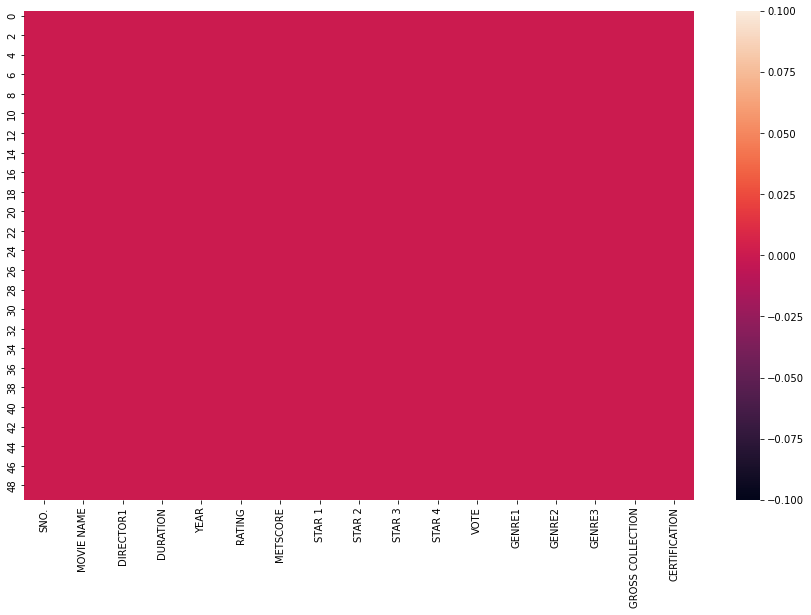

In [476]:
plt.figure(figsize=(15,9))
sns.heatmap(df.isnull())

# START DATA VISUALIZATION

# 1.) UNIVARIATE ANALAYSIS

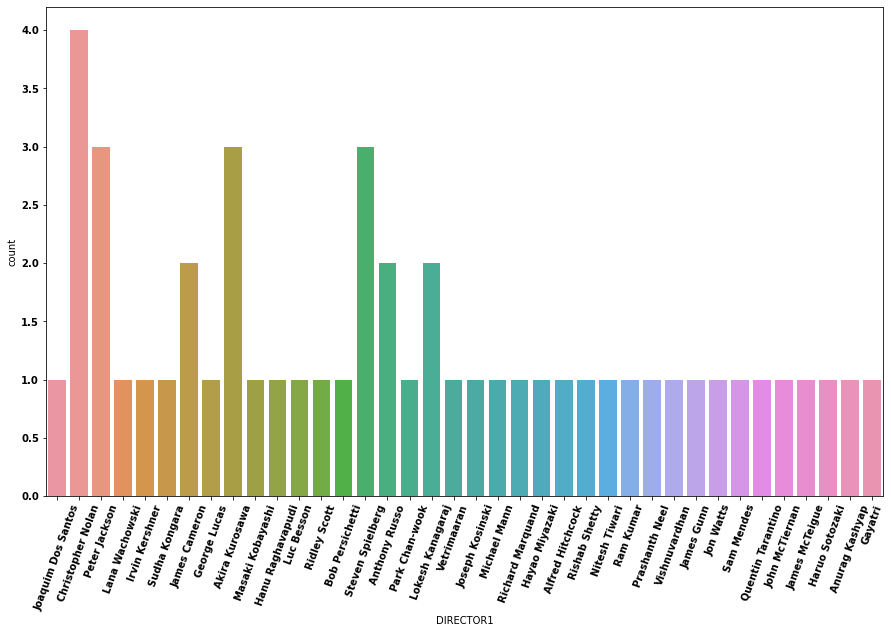

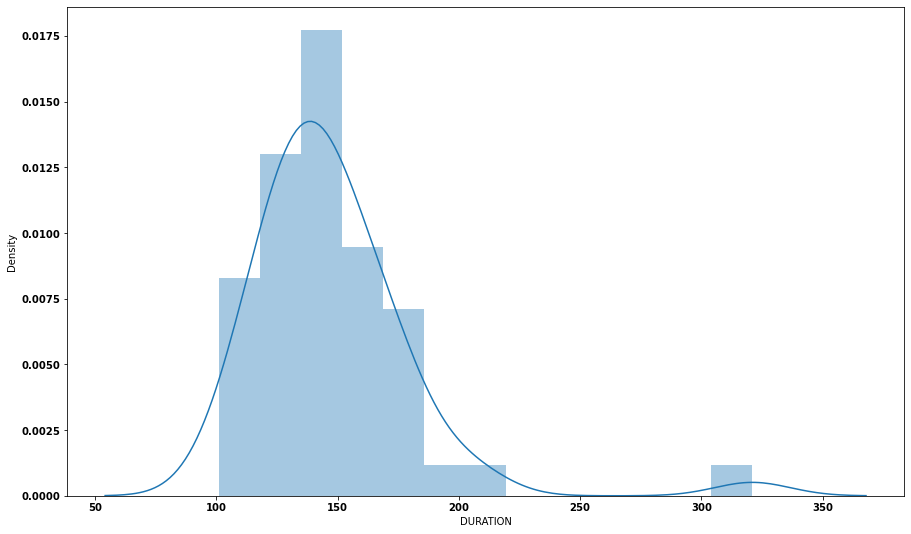

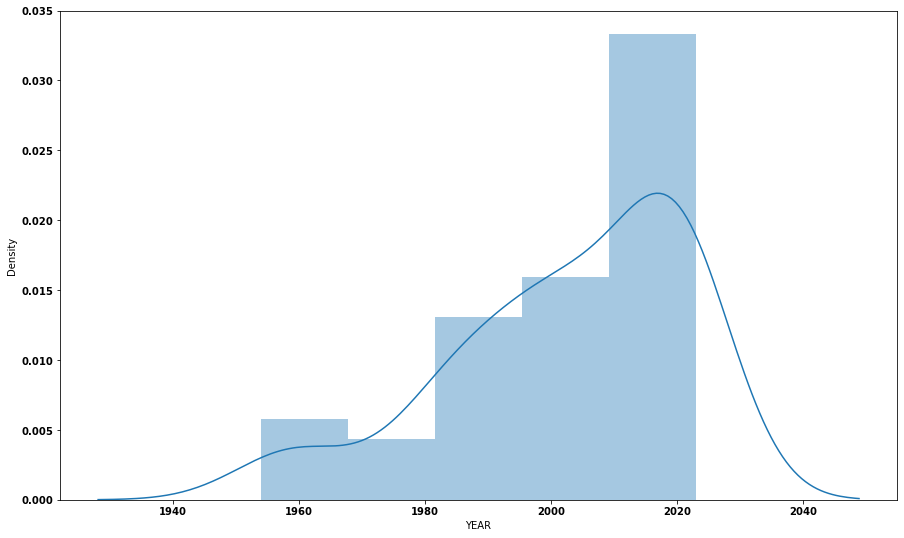

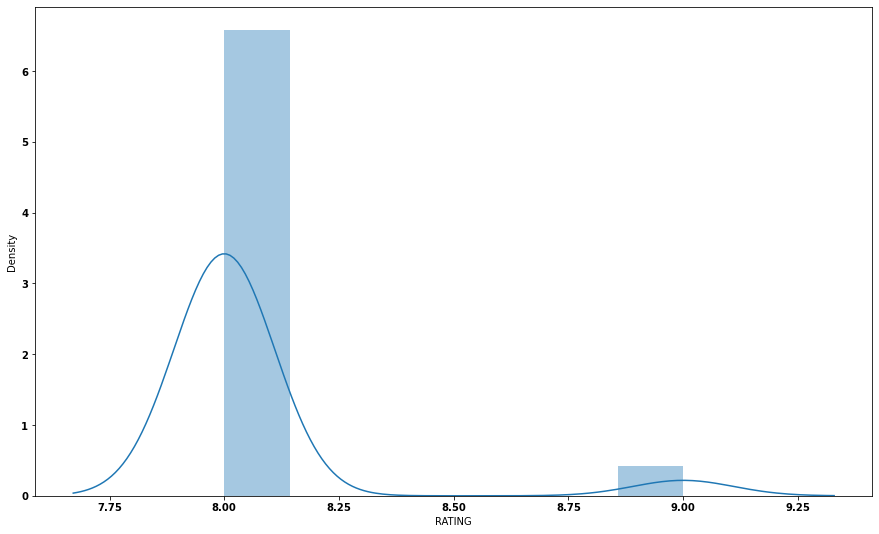

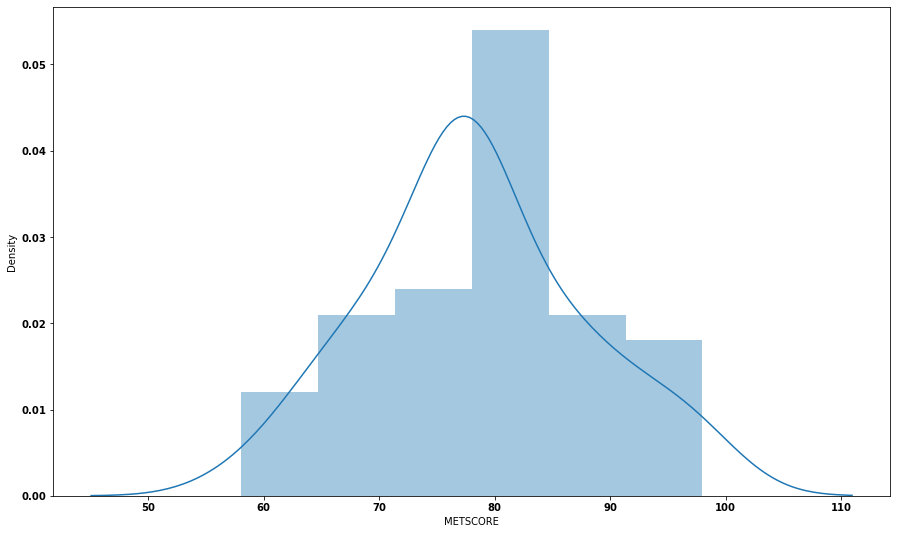

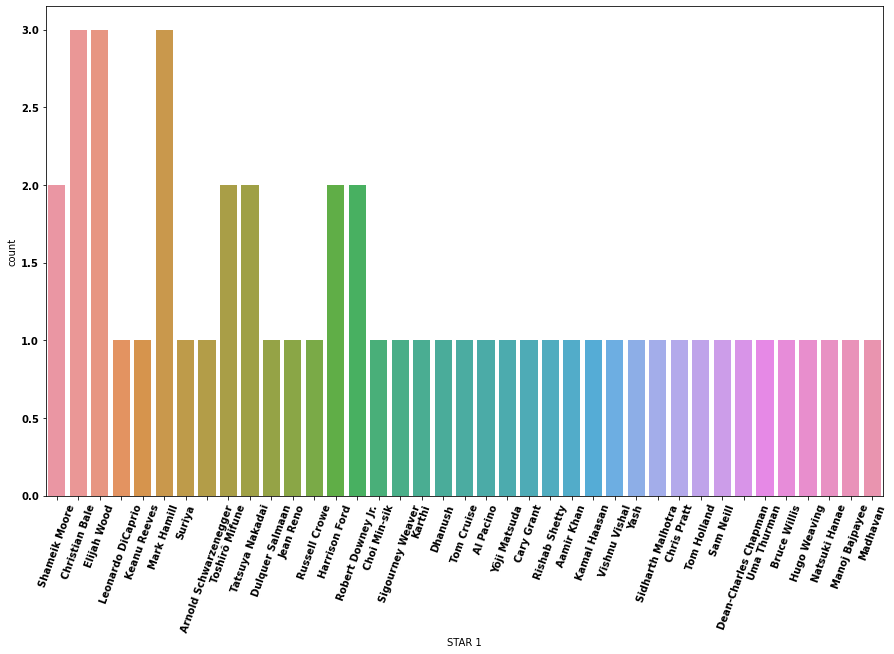

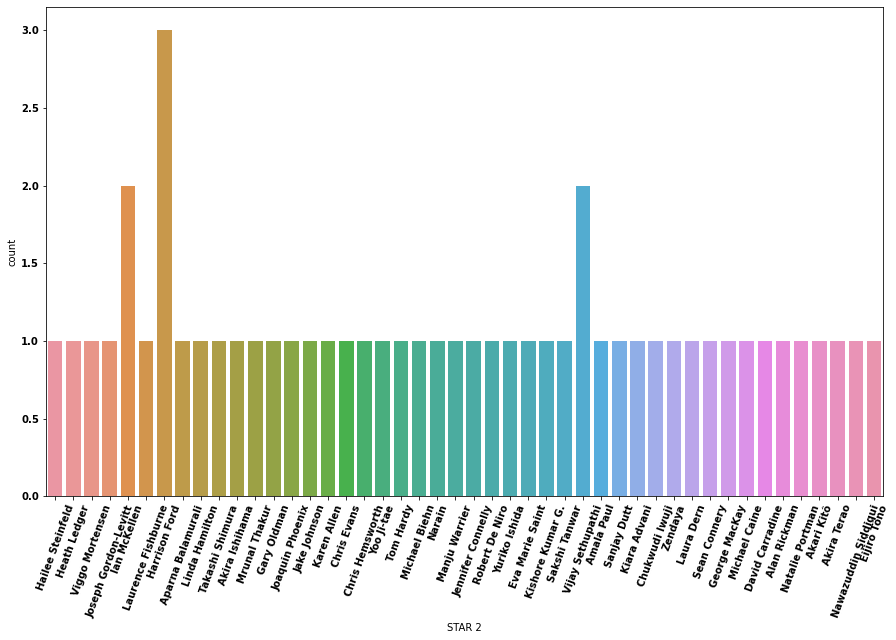

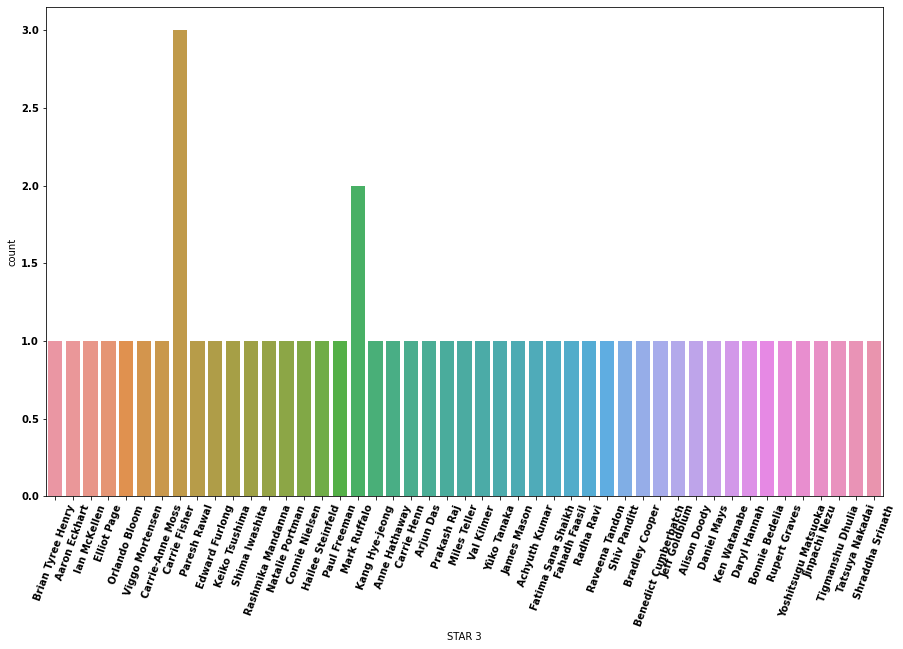

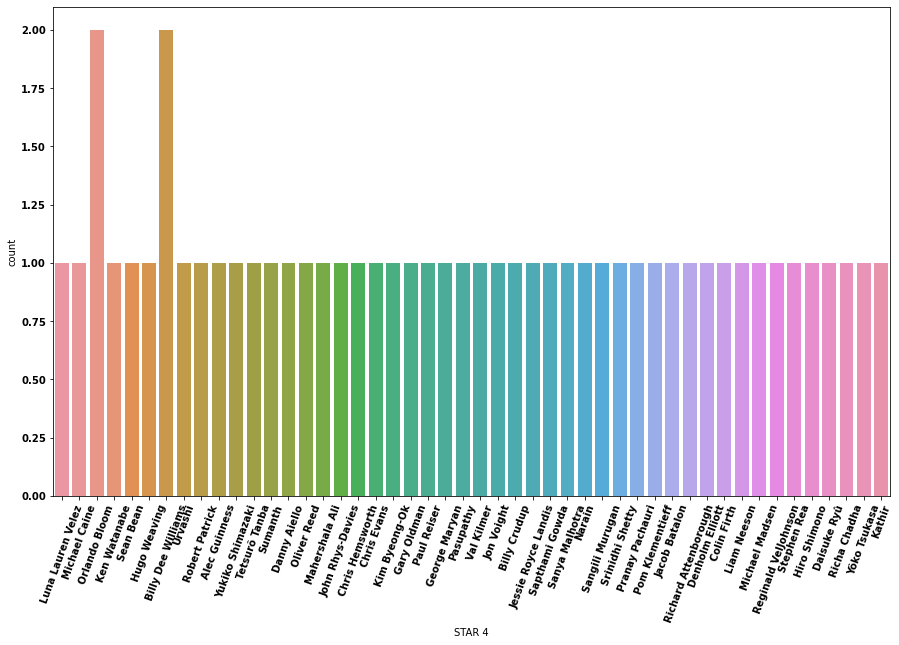

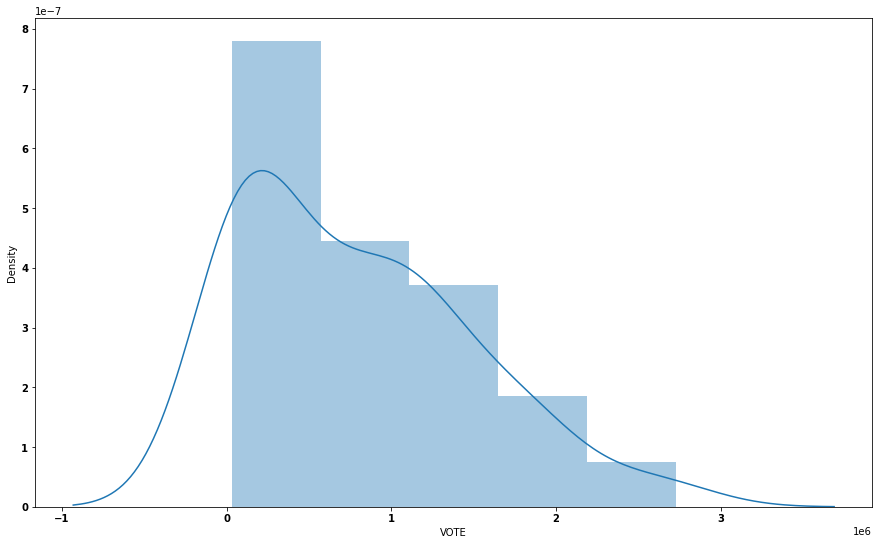

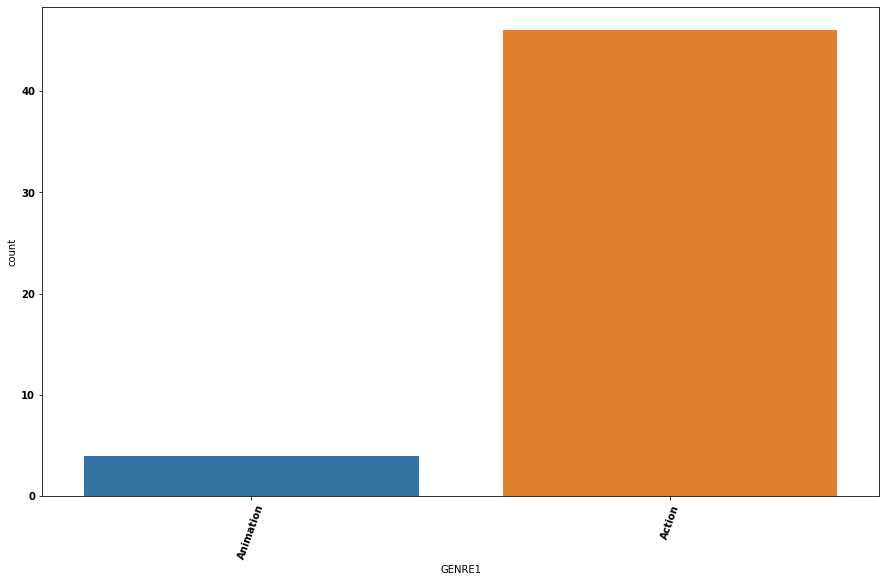

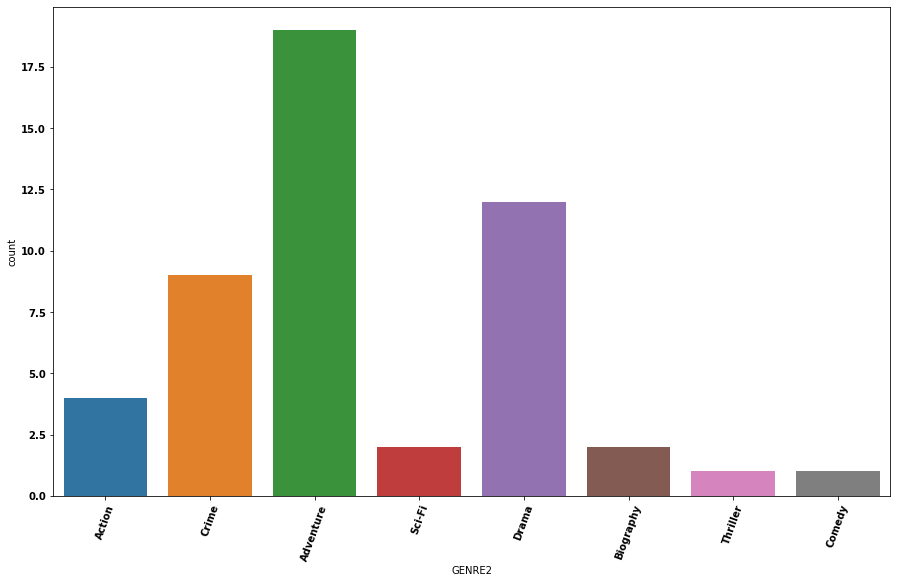

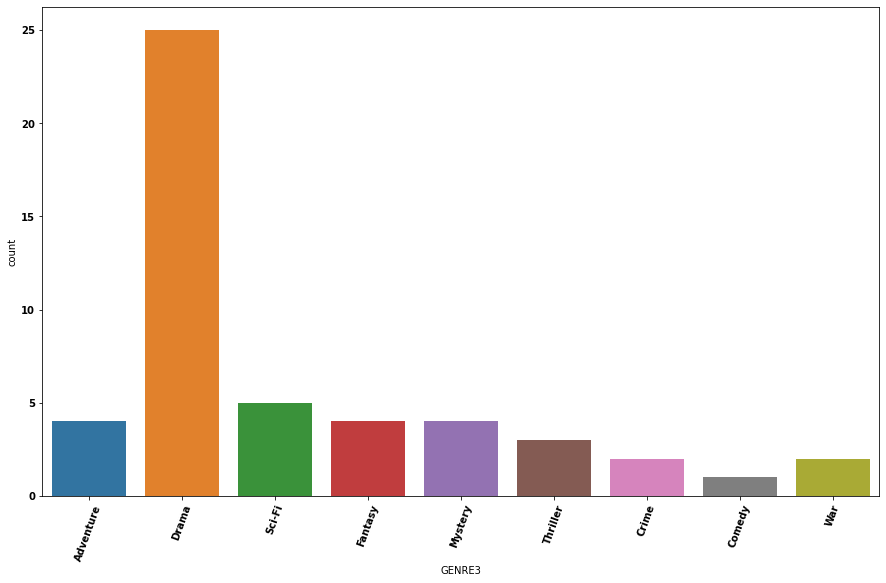

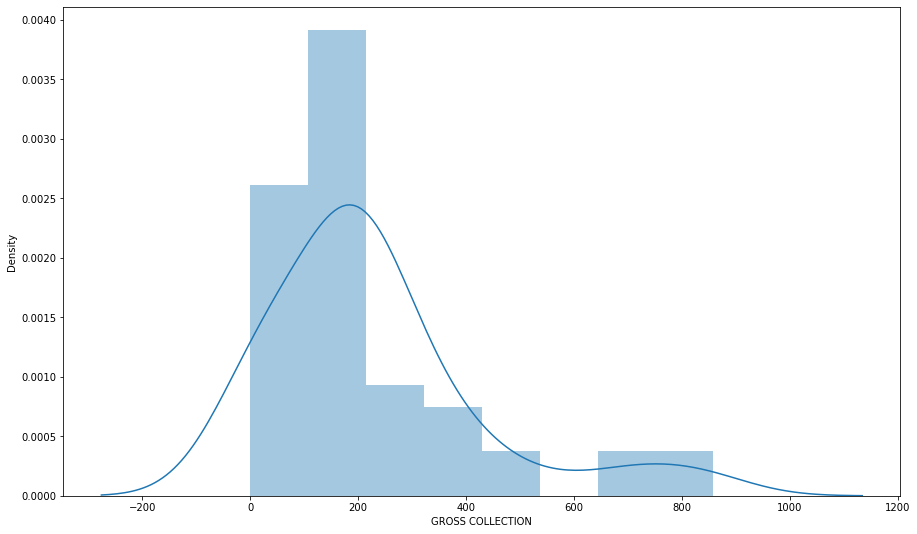

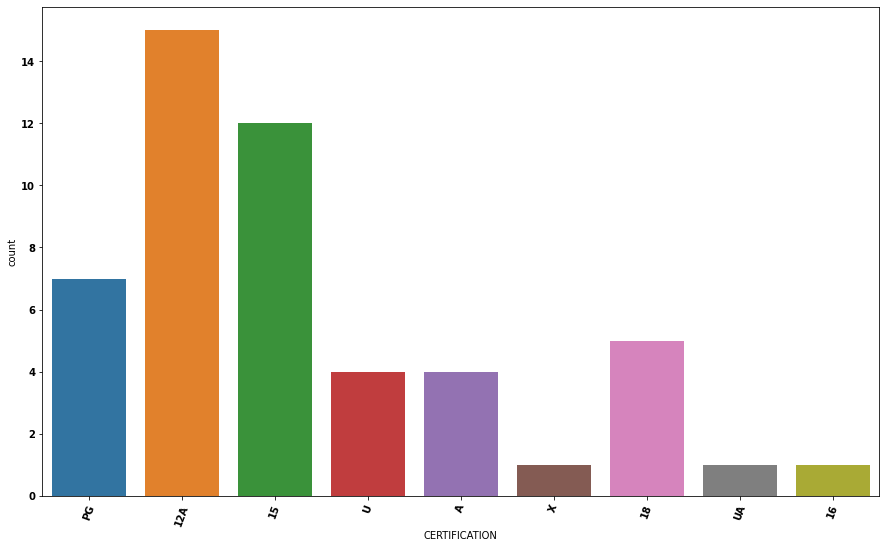

In [477]:
for i in df.columns[2:49]:
    if df[i].dtype=='O':
        plt.figure(figsize=(15,9))
        sns.countplot(df[i])
        plt.xticks(fontweight="bold",rotation=70)
        plt.yticks(fontweight="bold")
    if df[i].dtype=='int32':
        plt.figure(figsize=(15,9))
        sns.distplot(df[i])
        plt.xticks(fontweight="bold")
        plt.yticks(fontweight="bold")
    if df[i].dtype=='float64':
        plt.figure(figsize=(15,9))
        sns.distplot(df[i])

OBSERVATION:-
    
    * AS WE SEEN IN THE ABOVE GRAPH Christopher Nolan is the director of most top rated film and their is some others                 directors Peter Jackson,Peter Jackson,James Cameron,Steven Spielberg	
    
    * Christian Bale, Elijah Wood and Mark Hamill are three star which came frequently in the graph of top movies
    
    * In star 2 list laurence fishburne is most frequently came in the list
    
    * Carrie-Anne Moss and Mark Ruffalo are the star which came in star 3 list
    
    * The certification of most of the films is 12A and then 15 and then PG 
    
    * Duration of most of the movies is 150 in the list
    
    * year in which most of the top movies came is around 2019-2020
    
    * rating of most of the movies is 8
    
    * metscore of most of the movies is around 80-85
    
    * gross collection of nmost of the movies is lie between 200-400

# 2.) BIVARIATE ANALAYSIS

# 1.) BY DURATION VS VOTE

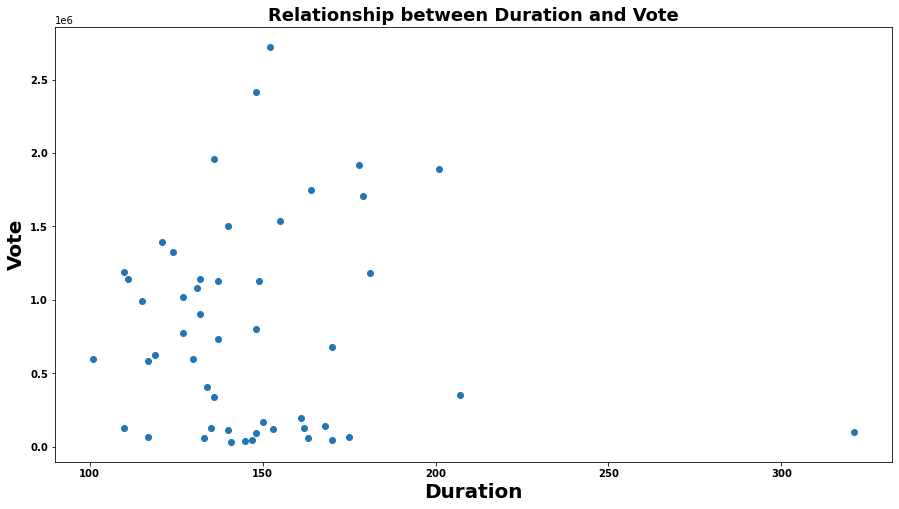

In [478]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.scatter(df['DURATION'], df['VOTE'])
plt.xlabel('Duration',fontweight='bold',fontsize=20)
plt.ylabel('Vote',fontweight='bold',fontsize=20)
plt.title('Relationship between Duration and Vote',fontweight='bold',fontsize=18)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()


OBSERVARTION:-
    
    * AS WE SEEN movies with 150 duration has higher number of votes

# 2.) BY DIRECTOR VS VOTE

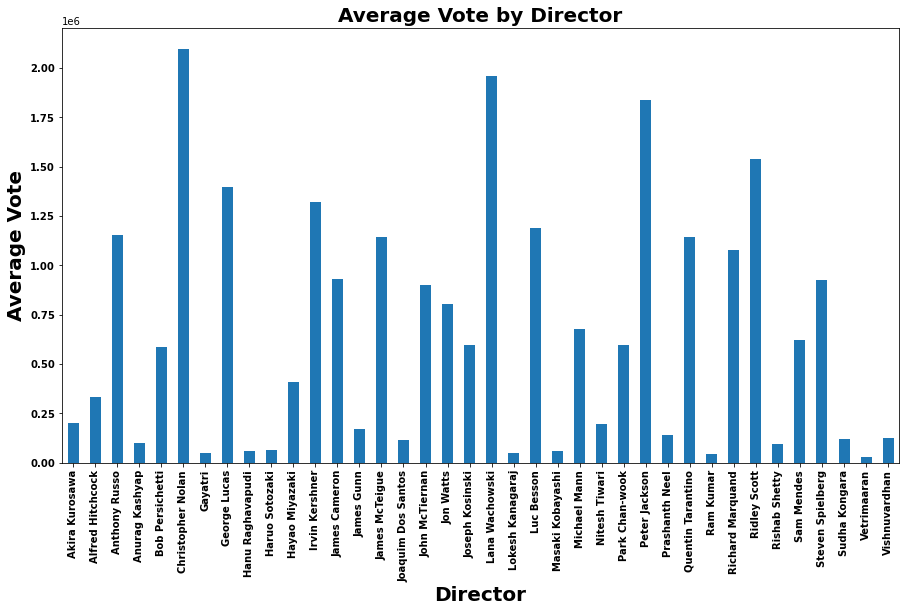

In [479]:
director_votes = df.groupby('DIRECTOR1')['VOTE'].mean()

plt.figure(figsize=(15,8))
director_votes.plot(kind='bar')
plt.xlabel('Director',fontweight='bold',fontsize=20)
plt.ylabel('Average Vote',fontweight='bold',fontsize=20)
plt.title('Average Vote by Director',fontweight='bold',fontsize=20)
plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
plt.xticks(rotation=90)  # Rotates x-axis labels for better readability
plt.show()


# OBSERVATION:- 
    
    * AS WE SEEN Christopher Nolan, Lana Wachowski and Peter Jackson are the directors who gets highest vote

# 3.) DURATION  VS VOTES

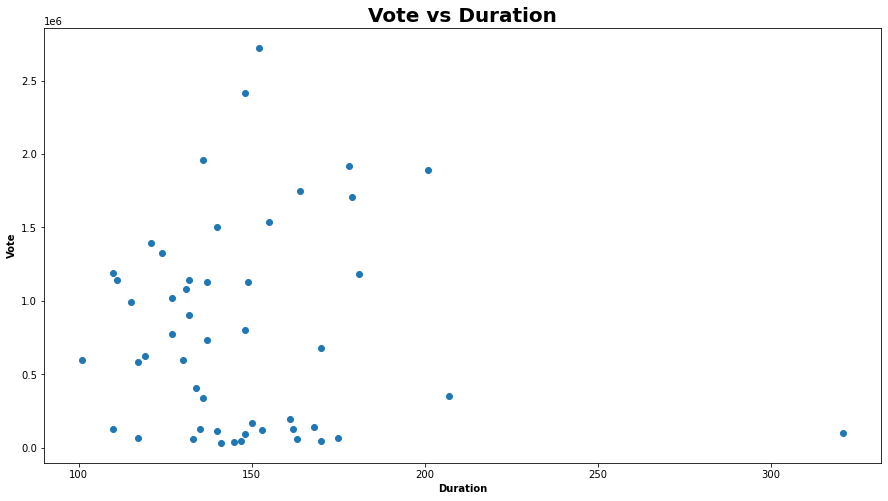

In [480]:
plt.figure(figsize=(15, 8))  # Set the figure size

plt.scatter(df['DURATION'], df['VOTE'])  # Plot the scatter plot
plt.xlabel('Duration',fontweight='bold')
plt.ylabel('Vote',fontweight='bold')
plt.title('Vote vs Duration',fontsize=20,fontweight='bold')

plt.show()  # Display the plot

OBSERVATION:-
    
    * AS WE SEEN MOVIES HAS 150 DURATION GETS HIGHEST VOTES

# 4.) YEAR VS VOTES

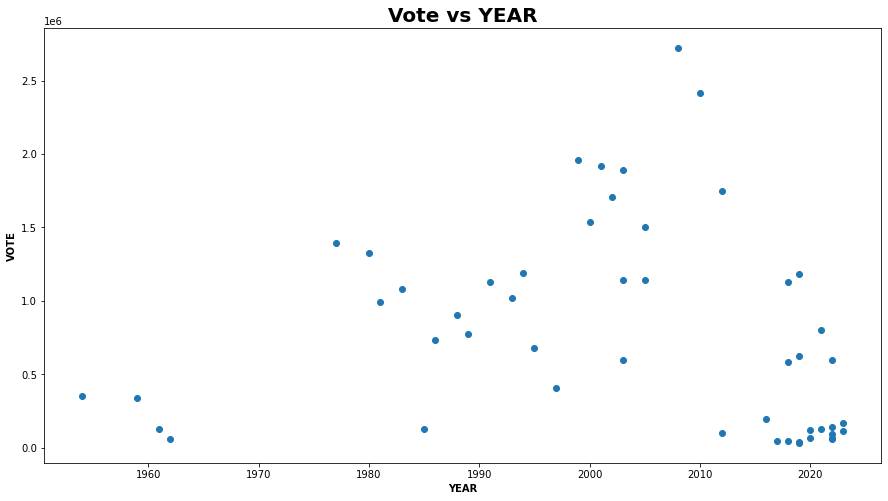

In [481]:
plt.figure(figsize=(15, 8))  # Set the figure size

plt.scatter(df['YEAR'], df['VOTE'])  # Plot the scatter plot
plt.xlabel('YEAR',fontweight='bold')
plt.ylabel('VOTE',fontweight='bold')
plt.title('Vote vs YEAR',fontsize=20,fontweight='bold')

plt.show()  # Display the plot

OBSERVATION:- 

     * AS WE CAN SEEN MOVIE WHICH CAME IN 2020 HAS HIGHEST VOTES

# 5.) VOTE VS METSCORE

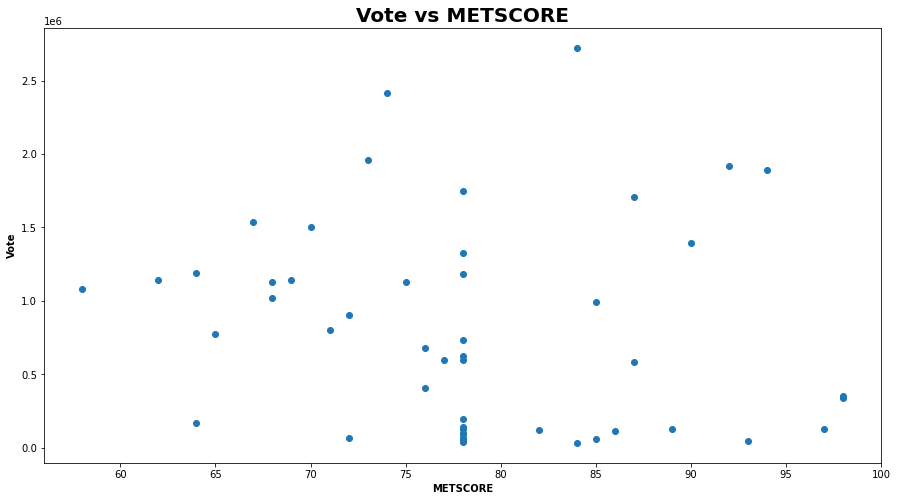

In [482]:
plt.figure(figsize=(15, 8))  # Set the figure size

plt.scatter(df['METSCORE'], df['VOTE'])  # Plot the scatter plot
plt.xlabel('METSCORE',fontweight='bold')
plt.ylabel('Vote',fontweight='bold')
plt.title('Vote vs METSCORE',fontsize=20,fontweight='bold')

plt.show()  # Display the plot

# 6) STAR 1 VS VOTE

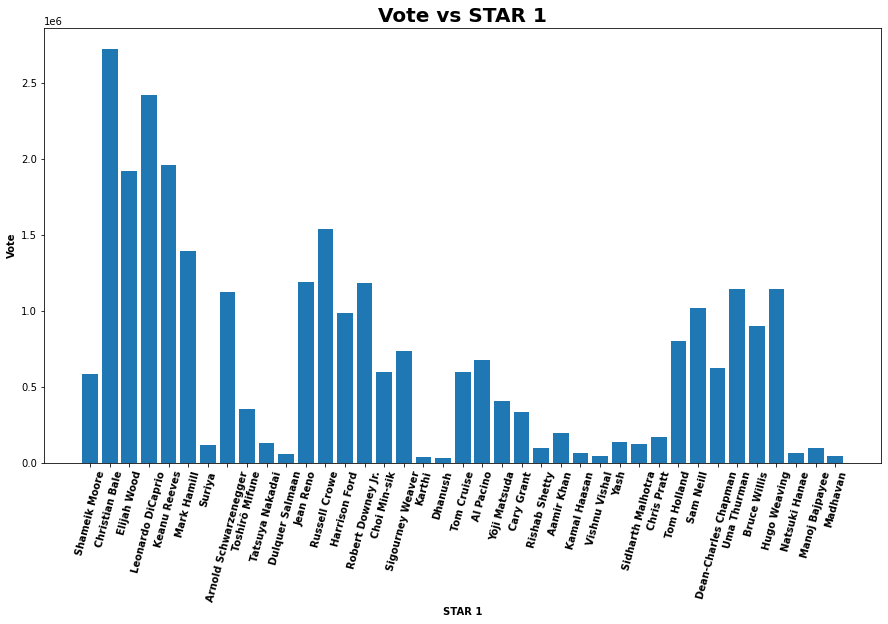

In [483]:
plt.figure(figsize=(15, 8))  # Set the figure size

plt.bar(df['STAR 1'], df['VOTE'])  # Plot the scatter plot
plt.xlabel('STAR 1',fontweight='bold')
plt.ylabel('Vote',fontweight='bold')
plt.xticks(rotation=75,fontweight='bold')
plt.title('Vote vs STAR 1',fontsize=20,fontweight='bold')

plt.show()  # Display the plot

observation:-
    
    * Christian Bale has the highest vote  in star list 1 then Leonardo DiCaprio and other 

# 7) GENRE 1 VS VOTES

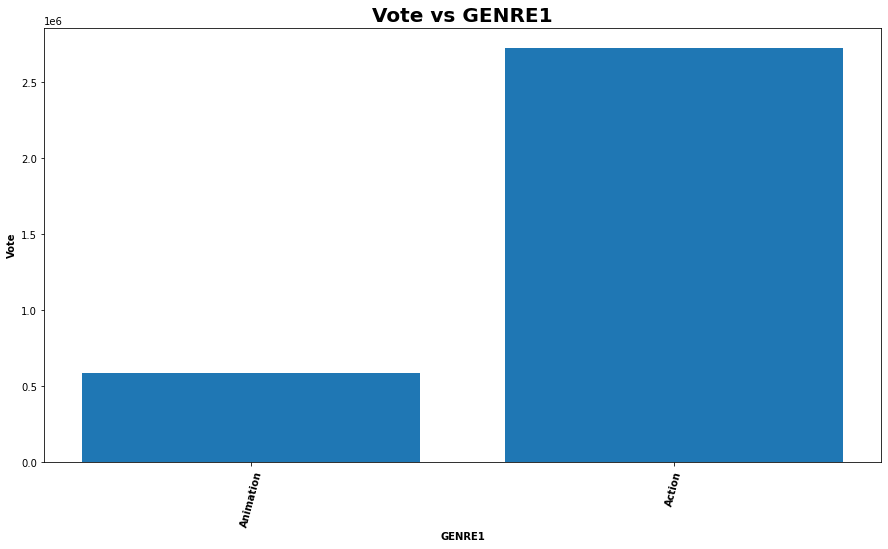

In [484]:
plt.figure(figsize=(15, 8))  # Set the figure size

plt.bar(df['GENRE1'], df['VOTE'])  # Plot the scatter plot
plt.xlabel('GENRE1',fontweight='bold')
plt.ylabel('Vote',fontweight='bold')
plt.xticks(rotation=75,fontweight='bold')
plt.title('Vote vs GENRE1',fontsize=20,fontweight='bold')

plt.show()  # Display the plot

OBSERVATION:-
    
    * AS WE SEEN ACTION MOVIES HAS THE HIGHEST VOTE

# 8.) CERTIFICATION VS VOTES

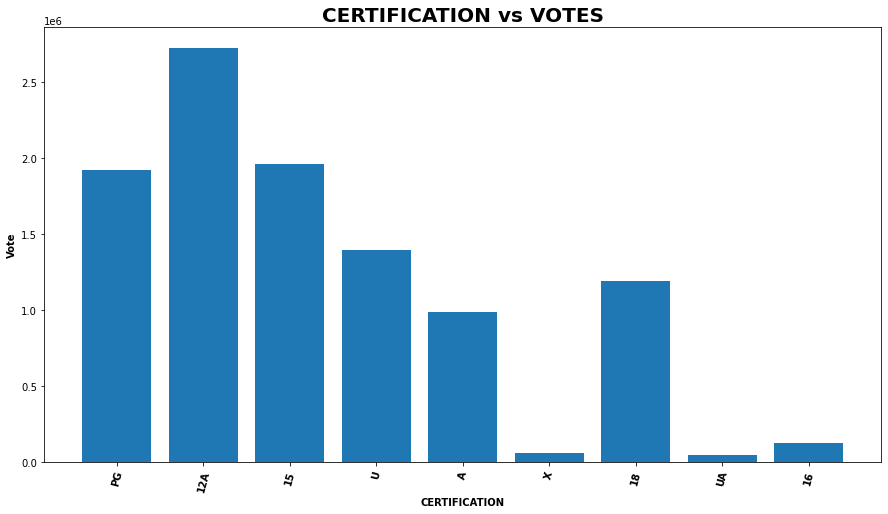

In [485]:
plt.figure(figsize=(15, 8))  # Set the figure size

plt.bar(df['CERTIFICATION'], df['VOTE'])  # Plot the scatter plot
plt.xlabel('CERTIFICATION',fontweight='bold')
plt.ylabel('Vote',fontweight='bold')
plt.xticks(rotation=75,fontweight='bold')
plt.title('CERTIFICATION vs VOTES',fontsize=20,fontweight='bold')

plt.show()  # Display the plot

OBSERVATION:-
    
    * AS WE SEEN 12A HAS THE HIGHEST VOTES IN THE ABOVE GRAPH
    * PG AND 15 ALMOST HAVING EQUAL VOTES

# NOW WITH THE GROSS COLLECTION 

# 1.) GROSS COLLECTION VS DURATION

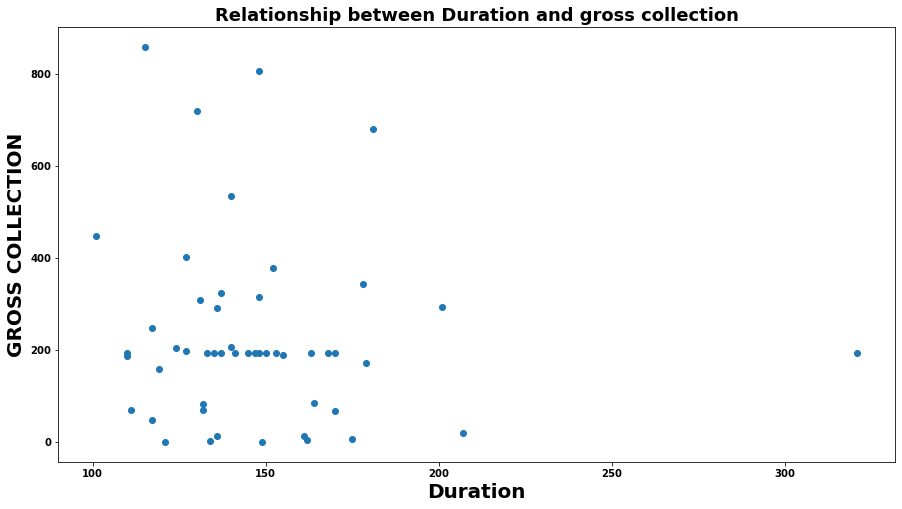

In [486]:
plt.figure(figsize=(15,8))
plt.scatter(df['DURATION'], df['GROSS COLLECTION'])
plt.xlabel('Duration',fontweight='bold',fontsize=20)
plt.ylabel('GROSS COLLECTION',fontweight='bold',fontsize=20)
plt.title('Relationship between Duration and gross collection',fontweight='bold',fontsize=18)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

OBSERVATION:-
    
    * AS WE SEEN WE GET THE SAME RESULT AS VOTE GRAPH WITH DURATION 150 MIN MOVIES HAS HIGH GROSS COLLECTION

# 2.) DIRECTION VS GROSS COLLECTION

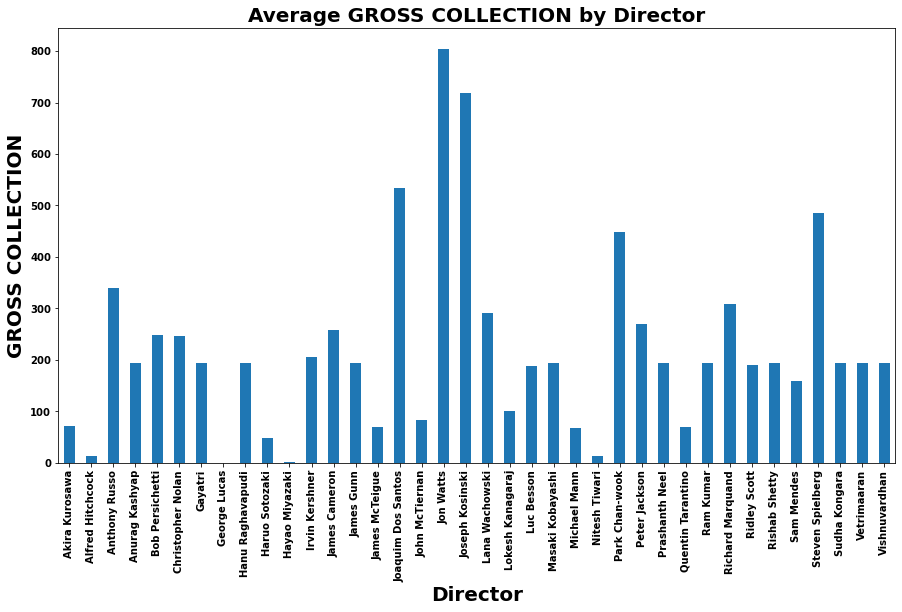

In [487]:
director_votes = df.groupby('DIRECTOR1')['GROSS COLLECTION'].mean()

plt.figure(figsize=(15,8))
director_votes.plot(kind='bar')
plt.xlabel('Director',fontweight='bold',fontsize=20)
plt.ylabel('GROSS COLLECTION',fontweight='bold',fontsize=20)
plt.title('Average GROSS COLLECTION by Director',fontweight='bold',fontsize=20)
plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
plt.xticks(rotation=90)  # Rotates x-axis labels for better readability
plt.show()

OBSERVATION:-
    
    * AS WE SEEN JON WATTS AND LOSEPH KOSINSKI ARE THE DIRECTORS WHICH HAS HIGH GROSS COLLECTION IN HIS MOVIES

# 3.) YEAR VS VOTES

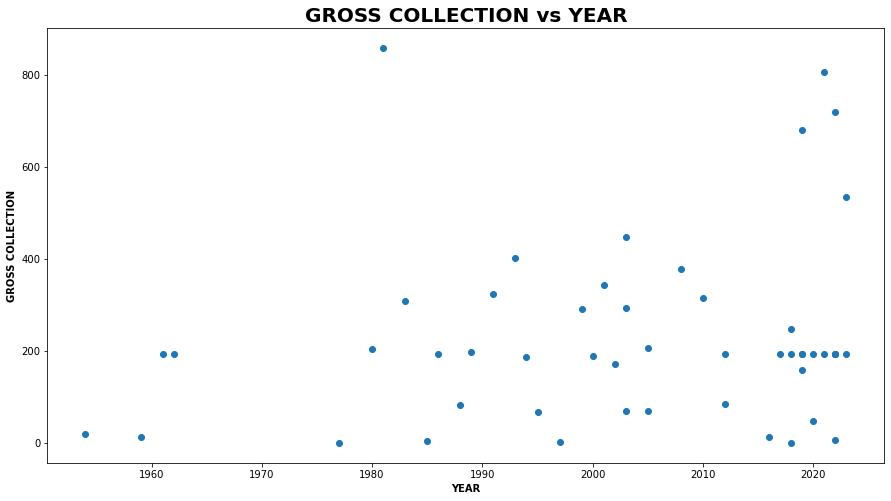

In [488]:
plt.figure(figsize=(15, 8))  # Set the figure size

plt.scatter(df['YEAR'], df['GROSS COLLECTION'])  # Plot the scatter plot
plt.xlabel('YEAR',fontweight='bold')
plt.ylabel('GROSS COLLECTION',fontweight='bold')
plt.title('GROSS COLLECTION vs YEAR',fontsize=20,fontweight='bold')

plt.show()  # Display the plot

OBSERVATION:-
    
    * AS WE SEEN WE HAVE SAME RESULT AS VOTE GRAPH 2020 MOVIE HAS HIGH GROSS COLLECTION VALUE

# 4.) GROSS COLLECTION VS METSCORE

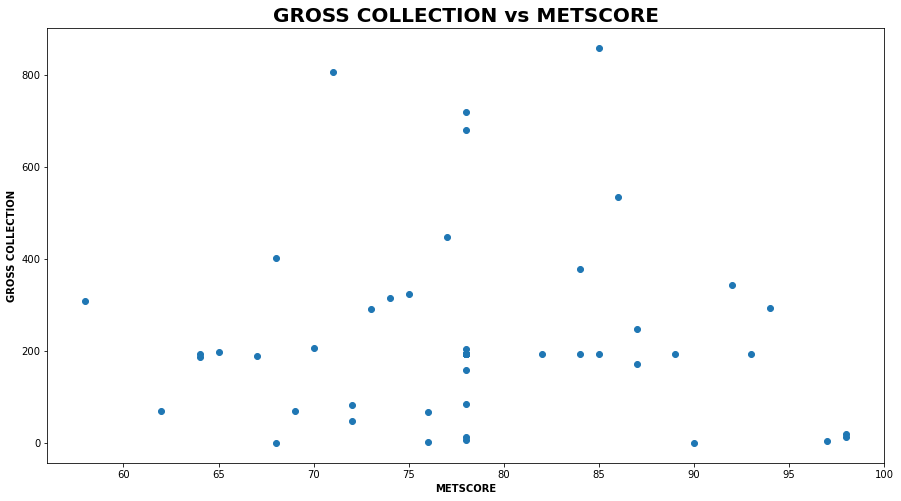

In [489]:
plt.figure(figsize=(15, 8))  # Set the figure size

plt.scatter(df['METSCORE'], df['GROSS COLLECTION'])  # Plot the scatter plot
plt.xlabel('METSCORE',fontweight='bold')
plt.ylabel('GROSS COLLECTION',fontweight='bold')
plt.title('GROSS COLLECTION vs METSCORE',fontsize=20,fontweight='bold')

plt.show()  # Display the plot

# 5.) STAR 1 VS GROSS COLLECTION

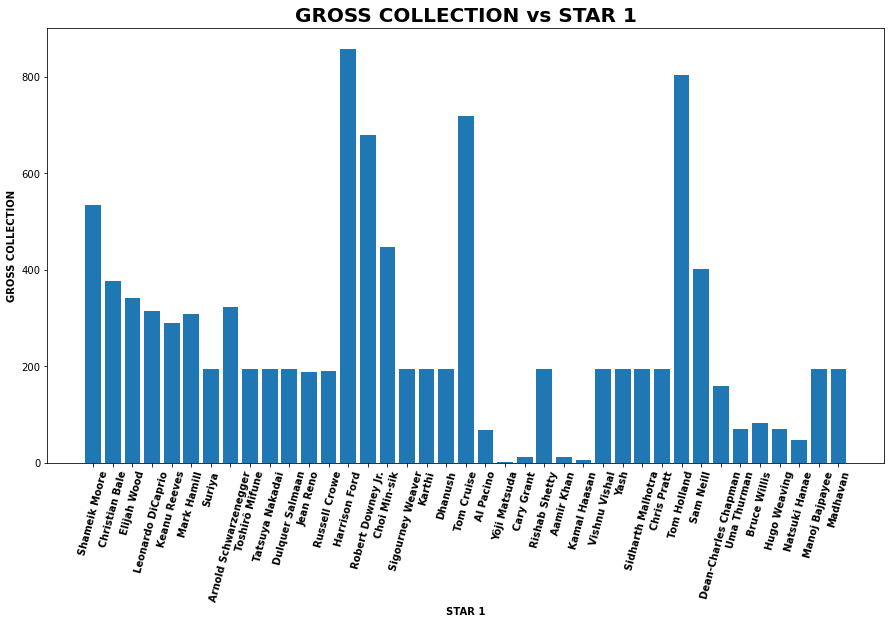

In [490]:
plt.figure(figsize=(15, 8))  # Set the figure size

plt.bar(df['STAR 1'], df['GROSS COLLECTION'])  # Plot the scatter plot
plt.xlabel('STAR 1',fontweight='bold')
plt.ylabel('GROSS COLLECTION',fontweight='bold')
plt.xticks(rotation=75,fontweight='bold')
plt.title('GROSS COLLECTION vs STAR 1',fontsize=20,fontweight='bold')

plt.show()  # Display the plot

OBSERVATION:-
    
    * AS WE SEEN HARRISON FORD AND HOLAND ARE THE STAR WITH HIGHEST GROSS COLLECTION IN THE PLOT

# 6.) GENRE 1 VS GROSS COLLECTION

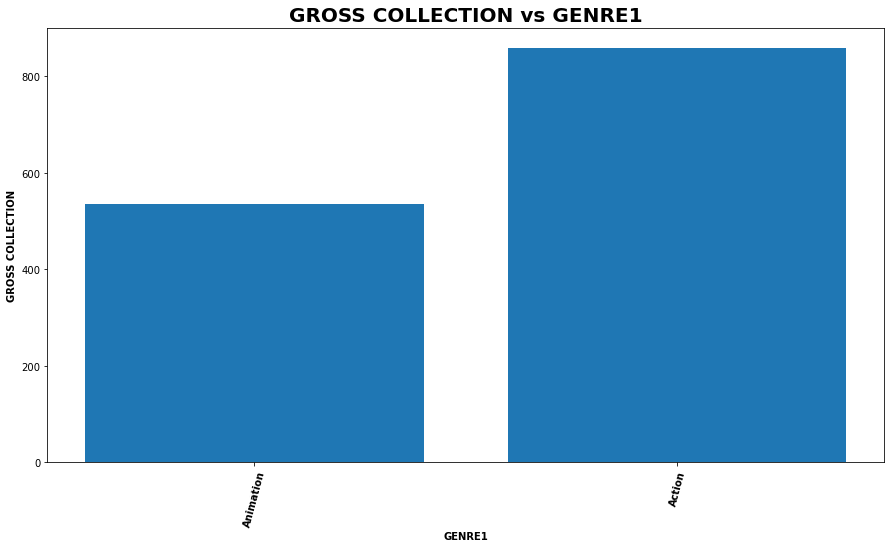

In [491]:
plt.figure(figsize=(15, 8))  # Set the figure size

plt.bar(df['GENRE1'], df['GROSS COLLECTION'])  # Plot the scatter plot
plt.xlabel('GENRE1',fontweight='bold')
plt.ylabel('GROSS COLLECTION',fontweight='bold')
plt.xticks(rotation=75,fontweight='bold')
plt.title('GROSS COLLECTION vs GENRE1',fontsize=20,fontweight='bold')

plt.show()  # Display the plot

# 7.) CERTIFICATION VS GROSS COLLECTION

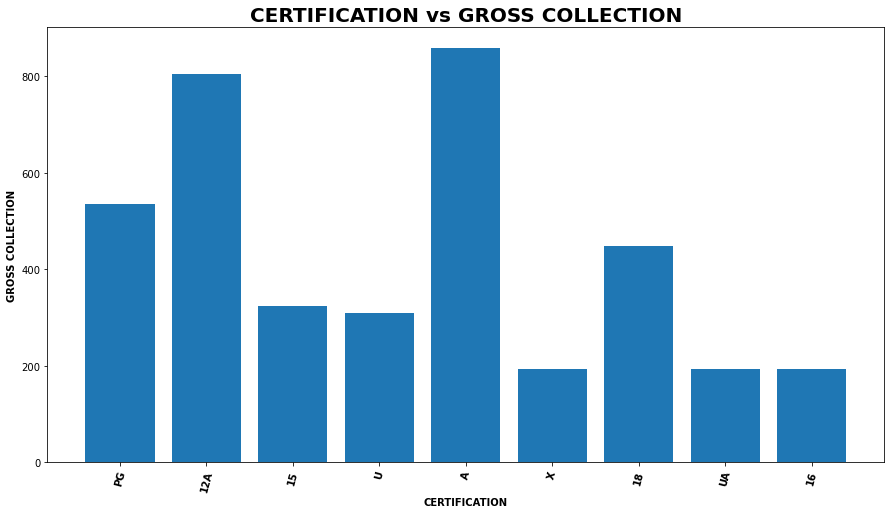

In [492]:
plt.figure(figsize=(15, 8))  # Set the figure size

plt.bar(df['CERTIFICATION'], df['GROSS COLLECTION'])  # Plot the scatter plot
plt.xlabel('CERTIFICATION',fontweight='bold')
plt.ylabel('GROSS COLLECTION',fontweight='bold')
plt.xticks(rotation=75,fontweight='bold')
plt.title('CERTIFICATION vs GROSS COLLECTION',fontsize=20,fontweight='bold')

plt.show()  # Display the plot

OBSERVATION:-
    
    * AS WE SEEN A CERTIFICATION HAS THE HIGHEST GROSS COLLECTION VALUE THEN FOLLOWED BY 12A

# MULTIVARIATE ANALAYSIS

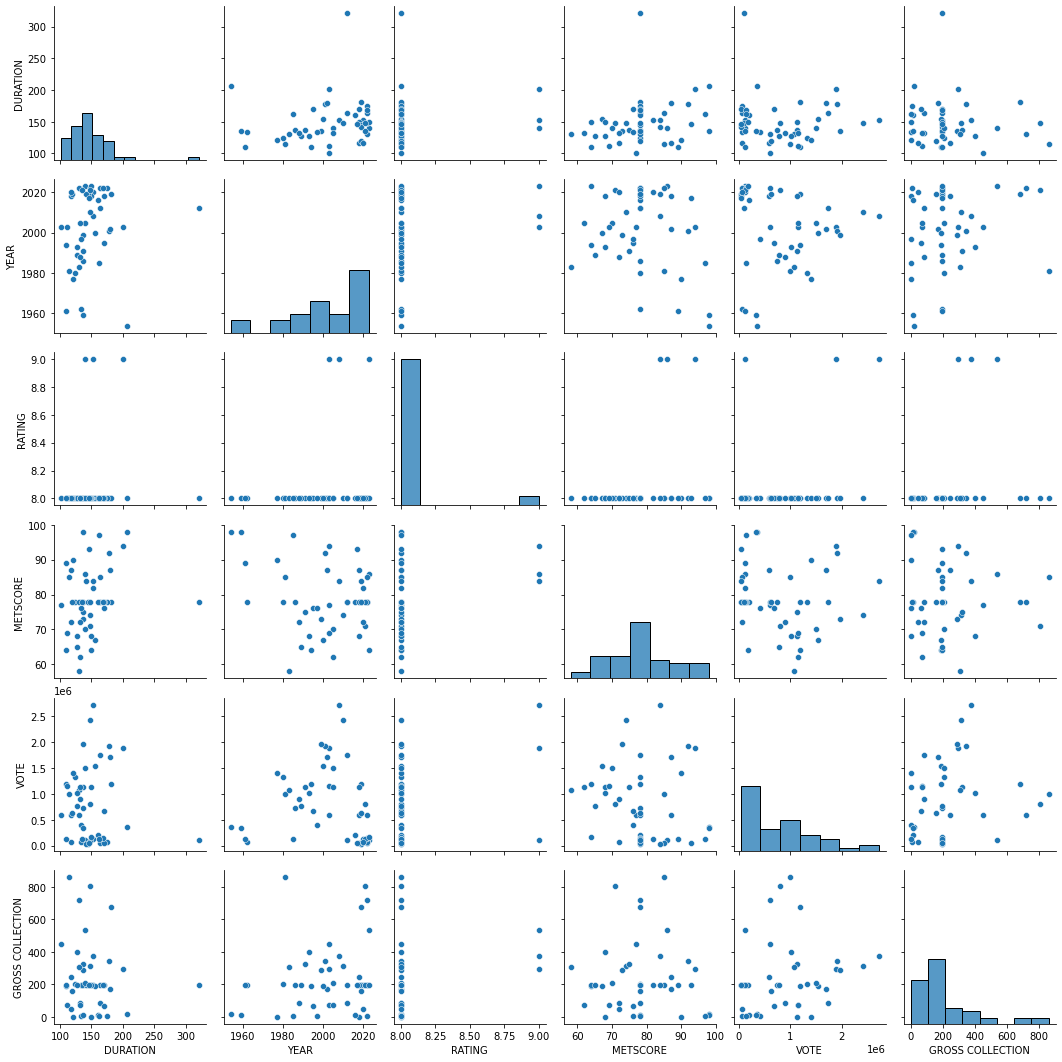

In [493]:
sns.pairplot(df)

# now find the correlation

In [494]:
df.corr()

,DURATION,YEAR,RATING,METSCORE,VOTE,GROSS COLLECTION
DURATION,1.000000,0.152261,0.123860,0.242627,-0.046937,-0.094717
YEAR,0.152261,1.000000,0.115520,-0.234392,-0.130858,0.175922
RATING,0.123860,0.115520,1.000000,0.258403,0.288130,0.218989
METSCORE,0.242627,-0.234392,0.258403,1.000000,-0.141282,-0.048117
VOTE,-0.046937,-0.130858,0.288130,-0.141282,1.000000,0.194774
GROSS COLLECTION,-0.094717,0.175922,0.218989,-0.048117,0.194774,1.000000


<AxesSubplot:>

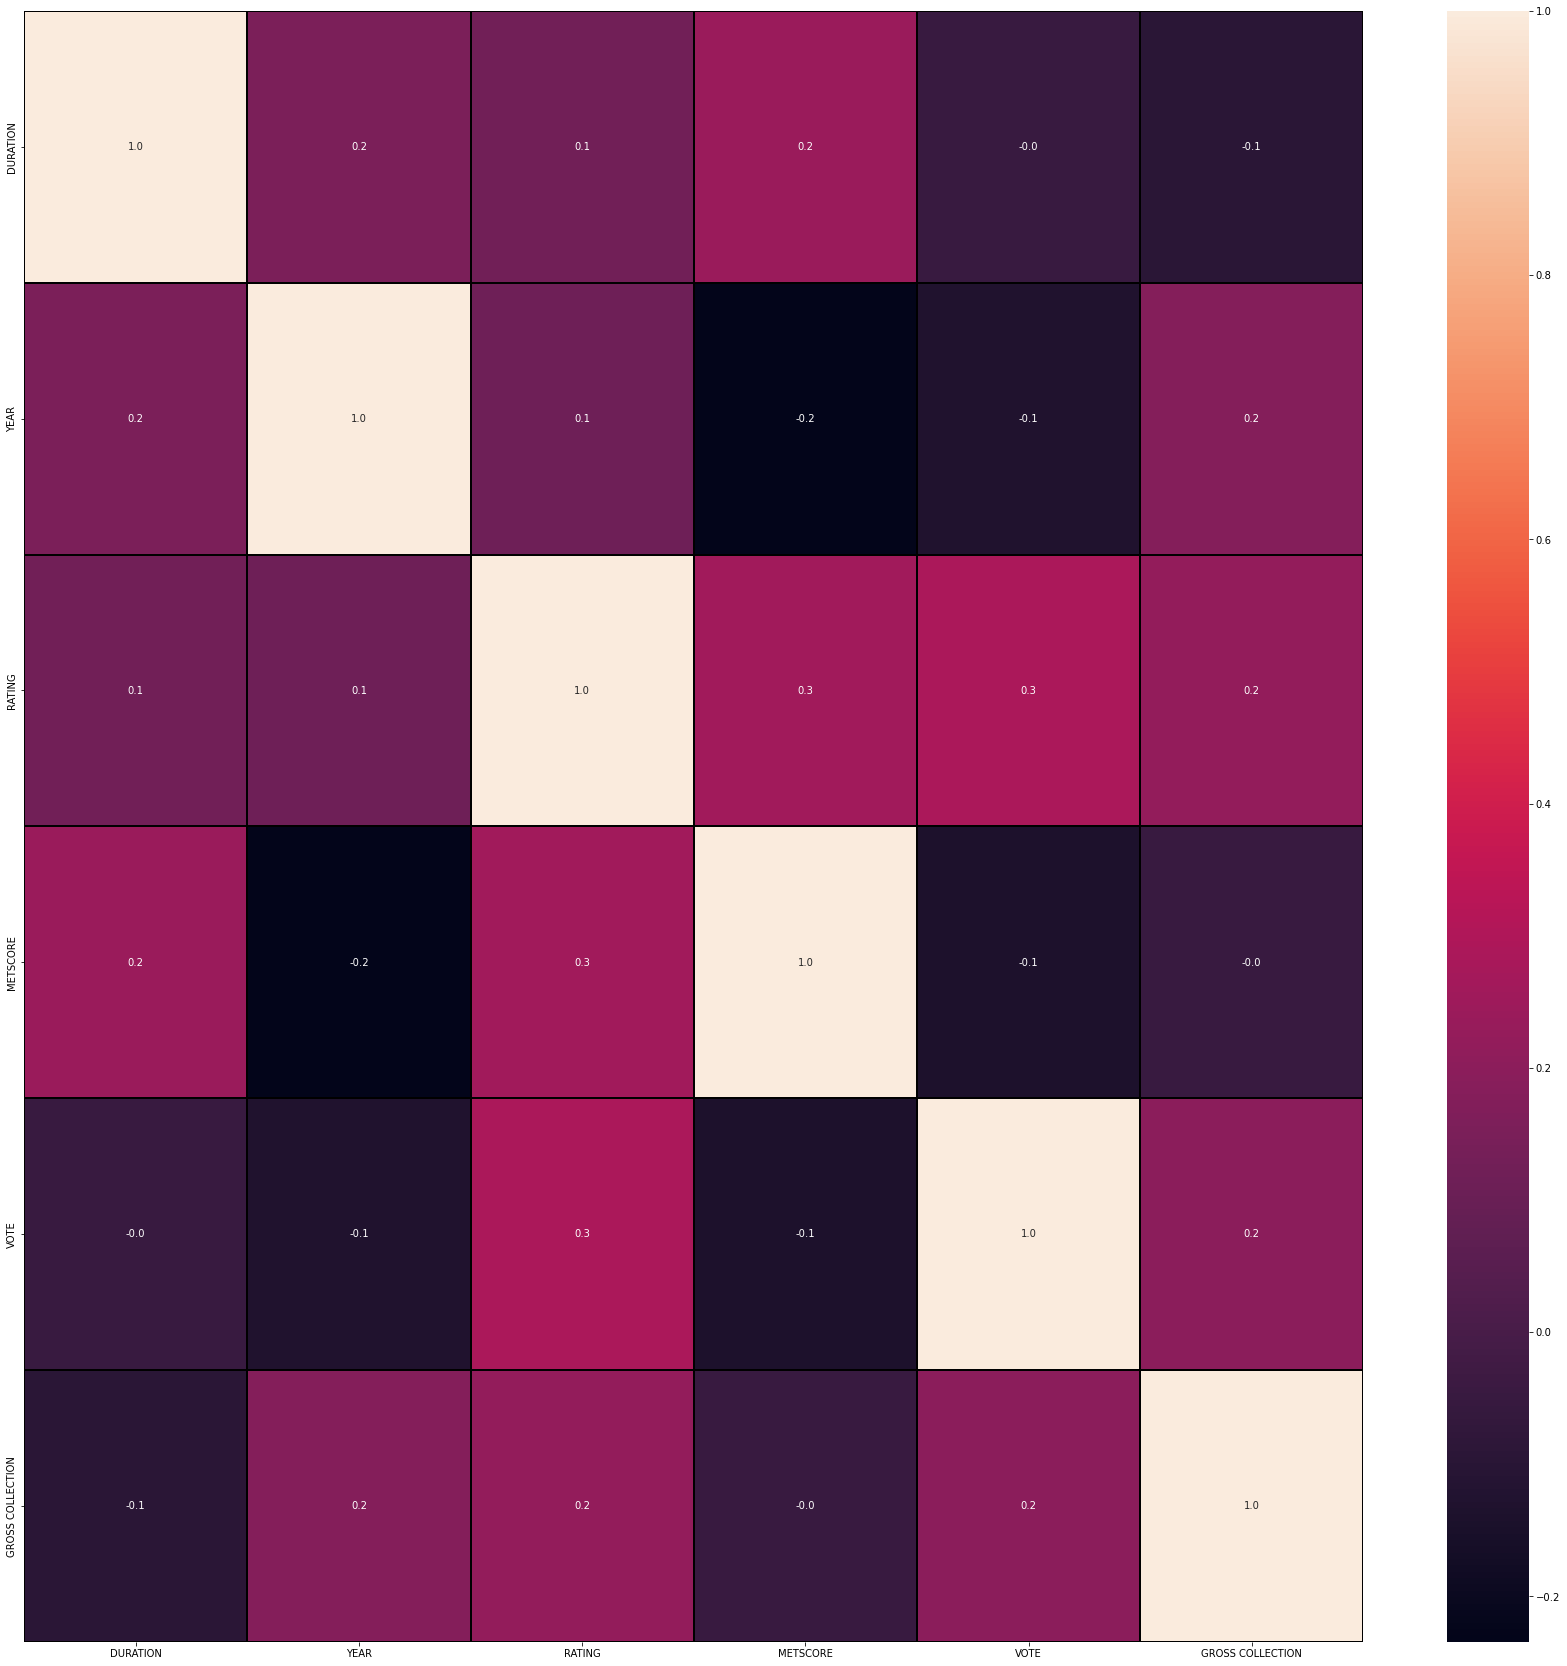

In [495]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),linewidths=0.1,annot=True,linecolor='black',fmt='0.1f')

<AxesSubplot:>

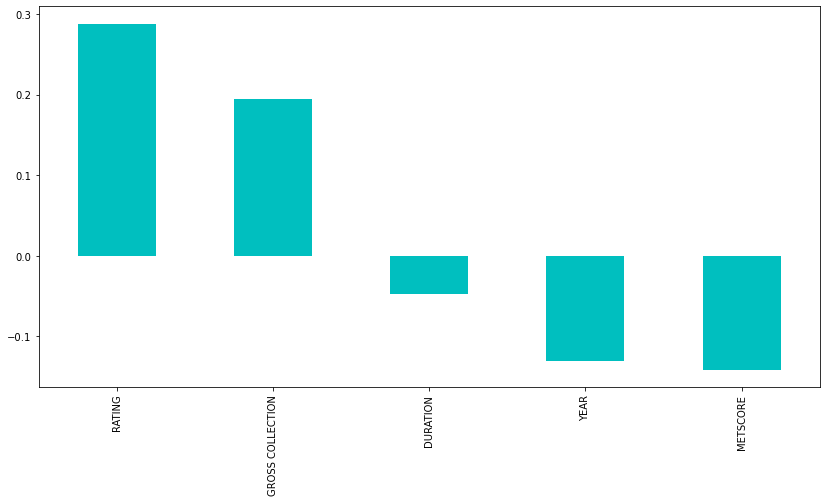

In [496]:
plt.figure(figsize=(14,7))
df.corr()['VOTE'].drop(['VOTE']).sort_values(ascending=False).plot(kind='bar',color='c')

OBSERVATION:-
    
    * AS WE SEEN RATING IS POSITIVELY CORRELATED WITH VOTES AND YEAR AND METSCORE IS  NEGATIVELY CORRELATED WITH VOTES

<AxesSubplot:>

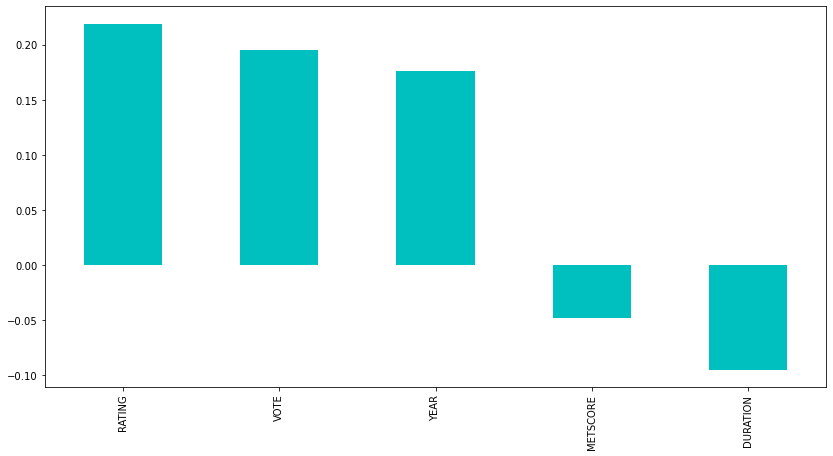

In [497]:
plt.figure(figsize=(14,7))
df.corr()['GROSS COLLECTION'].drop(['GROSS COLLECTION']).sort_values(ascending=False).plot(kind='bar',color='c')

OBSERVATION:-
    
    * RATING AND VOTE AND YEAR ARE POSITIVLY CORRELATED WITH GROSS COLLECTION AND METSCORE AND DURATION HAS NEGATIVELY         CORRELATED WITH GROSS COLLECTION

# ENCODING OF DATAFRAME

WE HAVE LOT OF CATEGORICAL DATA IN DATADRAME SO WE NEED TO ENCODE DATA INTO NUMERICAL DATA SO WILL BE UNDERSTABLE BY MACHINE

In [498]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [499]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=le.fit_transform(df[i])
df.head()


,SNO.,MOVIE NAME,DIRECTOR1,DURATION,YEAR,RATING,METSCORE,STAR 1,STAR 2,STAR 3,STAR 4,VOTE,GENRE1,GENRE2,GENRE3,GROSS COLLECTION,CERTIFICATION
0,0,32,15,140,2023,9,86,27,14,8,21,115843,1,0,0,534.86,5
1,11,39,5,152,2008,9,84,7,16,0,23,2724508,0,4,3,377.85,0
2,22,42,26,201,2003,9,94,11,41,20,27,1890537,0,1,3,292.58,0
3,33,14,5,148,2010,8,74,18,21,16,18,2418220,0,1,6,315.54,0
4,44,41,26,178,2001,8,92,11,17,30,39,1919131,0,1,3,342.55,5


# REMOVING OUTLIER

In [500]:
import numpy as np

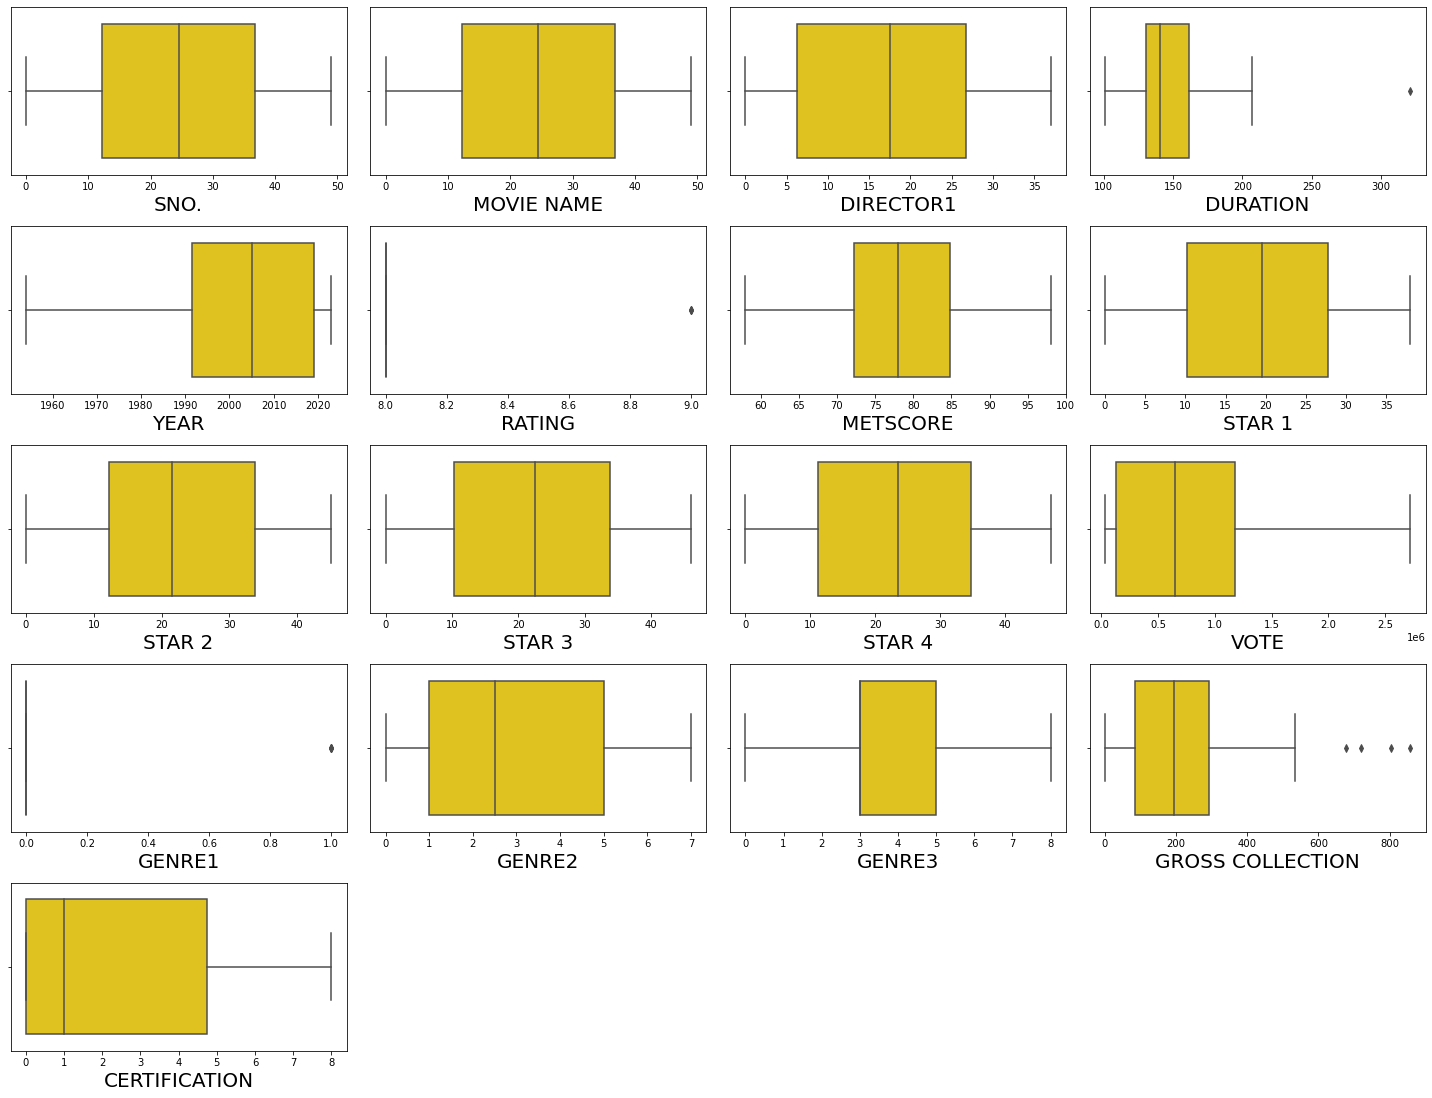

In [501]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1
for i in df.columns:
    if plotnumber<=40:
        ax=plt.subplot(10,4,plotnumber)
        sns.boxplot(df[i],color='gold')
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

OBSERVATION:-
    
    * AS WE SEEN DURATION, RATING,GENRE 1, AND GROSS COLLECTION HAVE SOME OUTLIERS SO WE HAVE TO REMOVE THEM

In [502]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 0,  0,  1,  2, 16, 17, 28, 45, 47], dtype=int64),
 array([ 5, 12,  5,  5, 12, 15, 12, 12,  3], dtype=int64))

In [503]:
df_new=df[(z<3).all(axis=1)]
df_new

,SNO.,MOVIE NAME,DIRECTOR1,DURATION,YEAR,RATING,METSCORE,STAR 1,STAR 2,STAR 3,STAR 4,VOTE,GENRE1,GENRE2,GENRE3,GROSS COLLECTION,CERTIFICATION
3,33,14,5,148,2010,8,74,18,21,16,18,2418220,0,1,6,315.540,0
4,44,41,26,178,2001,8,92,11,17,30,39,1919131,0,1,3,342.550,5
5,46,43,26,179,2002,8,87,11,17,44,27,1706282,0,1,3,171.480,0
6,47,44,19,136,1999,8,73,17,26,11,12,1961692,0,6,3,290.480,1
7,48,36,11,124,1980,8,78,21,15,9,2,1323672,0,1,4,204.840,6
8,49,31,35,153,2020,8,82,30,5,31,44,119624,0,5,3,193.705,1
9,1,38,12,137,1991,8,75,2,27,15,35,1125246,0,6,3,322.740,1
10,2,35,7,121,1977,8,90,21,15,9,0,1396008,0,1,4,0.270,6
11,3,28,0,207,1954,8,98,34,39,25,46,353368,0,5,3,19.500,4
12,4,12,22,133,1962,8,78,31,1,38,43,61236,0,5,5,193.705,8


In [504]:
df.shape

(50, 17)

In [505]:
df_new.shape

(42, 17)

In [506]:
data_loss=((50-47)/50)*100

In [507]:
data_loss

6.0

# 6 percent is less then 10 percent

In [508]:
df=df_new

In [509]:
df.head()

,SNO.,MOVIE NAME,DIRECTOR1,DURATION,YEAR,RATING,METSCORE,STAR 1,STAR 2,STAR 3,STAR 4,VOTE,GENRE1,GENRE2,GENRE3,GROSS COLLECTION,CERTIFICATION
3,33,14,5,148,2010,8,74,18,21,16,18,2418220,0,1,6,315.54,0
4,44,41,26,178,2001,8,92,11,17,30,39,1919131,0,1,3,342.55,5
5,46,43,26,179,2002,8,87,11,17,44,27,1706282,0,1,3,171.48,0
6,47,44,19,136,1999,8,73,17,26,11,12,1961692,0,6,3,290.48,1
7,48,36,11,124,1980,8,78,21,15,9,2,1323672,0,1,4,204.84,6


# seprating the columns into feature and target

# a.) votes

In [510]:
from sklearn.preprocessing import power_transform 

# Divide the data into features and vectors.

X=df.drop(['VOTE'], axis=1)
y=df.iloc[:,0]

x=power_transform(x, method='yeo-johnson')

In [511]:
X=pd.DataFrame(data=X)

# scaling the data using StandardScaler.

In [512]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# VIF calculation

In [513]:
df.columns

Index(['SNO.', 'MOVIE NAME', 'DIRECTOR1', 'DURATION', 'YEAR', 'RATING',
       'METSCORE', 'STAR 1', 'STAR 2', 'STAR 3', 'STAR 4', 'VOTE', 'GENRE1',
       'GENRE2', 'GENRE3', 'GROSS COLLECTION', 'CERTIFICATION'],
      dtype='object')

In [514]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Store the column names
column_names = X.columns.tolist()

# Convert the scaled data back to a DataFrame with column names
X_scaled = pd.DataFrame(data=X_scaled, columns=column_names)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]

# Display the VIF values
print(vif_data)


             Feature       VIF
0               SNO.  1.259952
1         MOVIE NAME  1.420969
2          DIRECTOR1  1.896062
3           DURATION  1.653502
4               YEAR  2.746863
5             RATING       NaN
6           METSCORE  1.651629
7             STAR 1  1.348330
8             STAR 2  1.353502
9             STAR 3  1.418393
10            STAR 4  1.630169
11            GENRE1       NaN
12            GENRE2  1.514654
13            GENRE3  1.303119
14  GROSS COLLECTION  1.352160
15     CERTIFICATION  2.583300


# MACHIME LEARNING MODEL

In [515]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score

# SELECT BEST RANDOM STATE

In [516]:
lin_reg=LinearRegression()
for i in range(0,100):
    X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.33,random_state=i)
    lin_reg.fit(X_train,y_train)
    pred_train=lin_reg.predict(X_train)
    pred_test=lin_reg.predict(X_test)
    print(f'At random state{i}, The training accuracy is : {r2_score(y_train,pred_train)}')
    print(f'At random state{i}, The test accuracy is : {r2_score(y_test,pred_test)}')
    print('\n')

At random state0, The training accuracy is : 1.0
At random state0, The test accuracy is : 1.0


At random state1, The training accuracy is : 1.0
At random state1, The test accuracy is : 1.0


At random state2, The training accuracy is : 1.0
At random state2, The test accuracy is : 1.0


At random state3, The training accuracy is : 1.0
At random state3, The test accuracy is : 1.0


At random state4, The training accuracy is : 1.0
At random state4, The test accuracy is : 1.0


At random state5, The training accuracy is : 1.0
At random state5, The test accuracy is : 1.0


At random state6, The training accuracy is : 1.0
At random state6, The test accuracy is : 1.0


At random state7, The training accuracy is : 1.0
At random state7, The test accuracy is : 1.0


At random state8, The training accuracy is : 1.0
At random state8, The test accuracy is : 1.0


At random state9, The training accuracy is : 1.0
At random state9, The test accuracy is : 1.0


At random state10, The training accuracy

# AS WE CONCLUDE THAT 88 STATE GAVE HIGHEST VALUE, SO TAKE 88 AS RANDOM STATE

In [517]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=88,test_size=0.22)

In [518]:
X_train.shape

(32, 16)

In [519]:
y_train.shape

(32,)

In [520]:
X_test.shape

(10, 16)

In [521]:
y_test.shape

(10,)

# 1.) LINEAR REGRESSION

In [522]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)
pred=lr.predict(X_test)

In [523]:
print('\033[1m'+ 'Error :'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,pred))
print('Mean squared error :', mean_squared_error(y_test,pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(y_test,pred)))
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(y_test,pred)*100)

Error :
Mean absolute error : 3.11750625314744e-14
Mean squared error : 1.966235806263372e-27
Root Mean squared error : 4.434225756841178e-14
 R2 Score :
100.0


In [524]:
score=cross_val_score(lr,X,y,cv=5)
print('\033[1m'+'Cross Validation Score :',lr,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(y_test,pred)*100)-(score.mean()*100))

Cross Validation Score : LinearRegression() :

Mean CV Score : 1.0
Difference in R2 & CV Score: 0.0


# 2.) SGD

In [525]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()
sgd.fit(X_train,y_train)
pred=sgd.predict(X_test)

In [526]:
print('\033[1m'+ 'Error :'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,pred))
print('Mean squared error :', mean_squared_error(y_test,pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(y_test,pred)))
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(y_test,pred)*100)

Error :
Mean absolute error : 7612122730042253.0
Mean squared error : 5.794983239337441e+31
Root Mean squared error : 7612478728599142.0
 R2 Score :
-3.2156835022126635e+31


In [527]:
score=cross_val_score(sgd,X,y,cv=5)
print('\033[1m'+'Cross Validation Score :',sgd,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(y_test,pred)*100)-(score.mean()*100))

Cross Validation Score : SGDRegressor() :

Mean CV Score : -1.4310096117949282e+30
Difference in R2 & CV Score: 1.1094412615736617e+32


# 3.) RANDOM FOREST REGRESSION

In [528]:
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
pred=rfr.predict(X_test)

In [529]:
print('\033[1m'+ 'Error :'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,pred))
print('Mean squared error :', mean_squared_error(y_test,pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(y_test,pred)))
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(y_test,pred)*100)

Error :
Mean absolute error : 0.9340000000000007
Mean squared error : 1.0599600000000016
Root Mean squared error : 1.0295435881981887
 R2 Score :
99.41181954386549


In [530]:
score=cross_val_score(rfr,X,y,cv=5)
print('\033[1m'+'Cross Validation Score :',rfr,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(y_test,pred)*100)-(score.mean()*100))

Cross Validation Score : RandomForestRegressor() :

Mean CV Score : -0.6175771235045
Difference in R2 & CV Score: 161.1695318943155


# 4.)DECISION TREE REGRESSION

In [531]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

In [532]:
print('\033[1m'+ 'Error :'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,pred))
print('Mean squared error :', mean_squared_error(y_test,pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(y_test,pred)))
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(y_test,pred)*100)

Error :
Mean absolute error : 2.3
Mean squared error : 6.3
Root Mean squared error : 2.5099800796022267
 R2 Score :
96.50407857499583


In [533]:
score=cross_val_score(dtr,X,y,cv=5)
print('\033[1m'+'Cross Validation Score :',dtr,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(y_test,pred)*100)-(score.mean()*100))

Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : -0.35850047496576437
Difference in R2 & CV Score: 132.35412607157227


# 5.) EXTRA TREE REGRESSION

In [534]:
etc=ExtraTreesRegressor()
etc.fit(X_train,y_train)
pred=etc.predict(X_test)

In [535]:
print('\033[1m'+ 'Error :'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,pred))
print('Mean squared error :', mean_squared_error(y_test,pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(y_test,pred)))
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(y_test,pred)*100)

Error :
Mean absolute error : 0.6719999999999993
Mean squared error : 0.6633799999999992
Root Mean squared error : 0.8144814301136639
 R2 Score :
99.63188502302869


In [536]:
score=cross_val_score(etc,X,y,cv=5)
print('\033[1m'+'Cross Validation Score :',etc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(y_test,pred)*100)-(score.mean()*100))

Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.9338002896817246
Difference in R2 & CV Score: 6.251856054856233


# 6.)XGBOOST REGRESSION

In [537]:
xg=XGBRegressor()
xg.fit(X_train,y_train)
pred=xg.predict(X_test)

In [538]:
print('\033[1m'+ 'Error :'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,pred))
print('Mean squared error :', mean_squared_error(y_test,pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(y_test,pred)))
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(y_test,pred)*100)

Error :
Mean absolute error : 1.0064342021942139
Mean squared error : 1.4120162817260506
Root Mean squared error : 1.1882829131675885
 R2 Score :
99.21646063940622


In [539]:
score=cross_val_score(xg,X,y,cv=5)
print('\033[1m'+'Cross Validation Score :',xg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(y_test,pred)*100)-(score.mean()*100))

Cross Validation Score : XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None) :

Mean CV Score : 0.4198135398837918
Difference in R2 & CV Score: 57.235106651027046


# HYPER PARAMETER TUNING: GRIDSEARCHCV

In [369]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression

# Define the hyperparameters to tune
param_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'copy_X': [True, False]
}

# Create a linear regression model
lr = LinearRegression()

# Perform random search cross-validation
lr_random = RandomizedSearchCV(estimator=lr, param_distributions=param_grid,
                               n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1,
                               scoring='neg_mean_squared_error')

# Fit the random search model
lr_random.fit(X_train, y_train)

# Print the best hyperparameters found
print(lr_random.best_params_)

# Evaluate the model
y_pred = lr_random.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'normalize': True, 'fit_intercept': True, 'copy_X': True}
Mean Squared Error: 0.00


In [543]:
final_mod=LinearRegression(normalize= True, fit_intercept= True, copy_X= True)
final_mod.fit(X_train,y_train)
pred=final_mod.predict(X_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',mean_squared_error(y_test,pred))
print('mean_absolute_error:',mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(mean_squared_error(y_test, pred)))

R2_Score: 100.0
mean_squared_error: 3.143610707305732e-28
mean_absolute_error: 1.4299672557172018e-14
RMSE value: 1.7730230419556686e-14


# SAVING THE MODEL

In [544]:
import joblib
joblib.dump(final_mod,"CAPSTONE_BY_VOTE.pkl")

['CAPSTONE_BY_VOTE.pkl']

# PREDICTION OF TEST DATA SET

In [545]:
model = joblib.load("CAPSTONE_BY_VOTE.pkl")

# Prediction
prediction = model.predict(X_test)
prediction

array([45., 41., 46., 31., 17., 15., 19.,  4., 29., 36.])

In [546]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9
Predicted,45.0,41.0,46.0,31.0,17.0,15.0,19.0,4.0,29.0,36.0
Original,45.0,41.0,46.0,31.0,17.0,15.0,19.0,4.0,29.0,36.0


# b) GROSS COLLECTION

# seprating the columns into feature and target

In [547]:
from sklearn.preprocessing import power_transform 

# Divide the data into features and vectors.

X=df.drop(['GROSS COLLECTION'], axis=1)
y=df.iloc[:,0]

x=power_transform(x, method='yeo-johnson')

# scaling the data using StandardScaler.

In [548]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# VIF CALCULATION

In [549]:
df.columns

Index(['SNO.', 'MOVIE NAME', 'DIRECTOR1', 'DURATION', 'YEAR', 'RATING',
       'METSCORE', 'STAR 1', 'STAR 2', 'STAR 3', 'STAR 4', 'VOTE', 'GENRE1',
       'GENRE2', 'GENRE3', 'GROSS COLLECTION', 'CERTIFICATION'],
      dtype='object')

In [550]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Store the column names
column_names = X.columns.tolist()

# Convert the scaled data back to a DataFrame with column names
X_scaled = pd.DataFrame(data=X_scaled, columns=column_names)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]

# Display the VIF values
print(vif_data)


          Feature       VIF
0            SNO.  1.270236
1      MOVIE NAME  1.473232
2       DIRECTOR1  1.898203
3        DURATION  1.627087
4            YEAR  2.875606
5          RATING       NaN
6        METSCORE  1.966047
7          STAR 1  1.299308
8          STAR 2  1.364330
9          STAR 3  1.420271
10         STAR 4  1.693437
11           VOTE  1.600895
12         GENRE1       NaN
13         GENRE2  1.529811
14         GENRE3  1.263057
15  CERTIFICATION  2.618184


# MACHINE LEARNING MODEL

In [551]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [552]:
lin_reg=LinearRegression()
for i in range(0,100):
    X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.33,random_state=i)
    lin_reg.fit(X_train,y_train)
    pred_train=lin_reg.predict(X_train)
    pred_test=lin_reg.predict(X_test)
    print(f'At random state{i}, The training accuracy is : {r2_score(y_train,pred_train)}')
    print(f'At random state{i}, The test accuracy is : {r2_score(y_test,pred_test)}')
    print('\n')

At random state0, The training accuracy is : 1.0
At random state0, The test accuracy is : 1.0


At random state1, The training accuracy is : 1.0
At random state1, The test accuracy is : 1.0


At random state2, The training accuracy is : 1.0
At random state2, The test accuracy is : 1.0


At random state3, The training accuracy is : 1.0
At random state3, The test accuracy is : 1.0


At random state4, The training accuracy is : 1.0
At random state4, The test accuracy is : 1.0


At random state5, The training accuracy is : 1.0
At random state5, The test accuracy is : 1.0


At random state6, The training accuracy is : 1.0
At random state6, The test accuracy is : 1.0


At random state7, The training accuracy is : 1.0
At random state7, The test accuracy is : 1.0


At random state8, The training accuracy is : 1.0
At random state8, The test accuracy is : 1.0


At random state9, The training accuracy is : 1.0
At random state9, The test accuracy is : 1.0


At random state10, The training accuracy

In [553]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=22)

In [554]:
X_test.shape

(14, 16)

In [555]:
y_test.shape

(14,)

In [556]:
X_train.shape

(28, 16)

In [557]:
y_train.shape

(28,)

In [558]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)
pred=lr.predict(X_test)

In [559]:
print('\033[1m'+ 'Error :'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,pred))
print('Mean squared error :', mean_squared_error(y_test,pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(y_test,pred)))
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(y_test,pred)*100)

Error :
Mean absolute error : 2.5884056802689363e-14
Mean squared error : 9.785256057191493e-28
Root Mean squared error : 3.128139392225272e-14
 R2 Score :
100.0


# SAVING THE MODEL

In [564]:
import joblib
joblib.dump(lr,"CAPSTONE_BY_GROSS COLLECTION.pkl")

['CAPSTONE_BY_GROSS COLLECTION.pkl']

# PREDICTION OF TEST DATA SET

In [561]:
model = joblib.load("CAPSTONE_BY_GROSS COLLECTION.pkl")

# Prediction
prediction = model.predict(X_test)
prediction

array([45., 43., 20., 23., 30., 44.,  7., 14., 19.,  5., 27.,  6., 17.,
       32.])

In [562]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Predicted,45.0,43.0,20.0,23.0,30.0,44.0,7.0,14.0,19.0,5.0,27.0,6.0,17.0,32.0
Original,45.0,43.0,20.0,23.0,30.0,44.0,7.0,14.0,19.0,5.0,27.0,6.0,17.0,32.0


IN PRDICTION OF VOTE AND GROSS COLLECTION WE USE LINEAR REGRESSION BRCAUSE IT GAVE MAXIMUM ACCURACY WHICH IS 100%

# THANK YOU